![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 22/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Vicente Correa
- Nombre de alumno 2: Diego Kauer

### **Link de repositorio de GitHub:** `https://github.com/diegokauer/MDS7202`

---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


# Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Se le recomienda levantar un ambiente de `conda` para instalar las librerías y así evitar cualquier problema con las versiones.


In [125]:
#pip install optuna

In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import set_config
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
import optuna

# 1. Introducción

En el siguiente informe se abordará un problema que enfrenta el conocido banco de Giturra, que consiste en predecir si un cliente termina siendo riesgoso o no para calificar a un crédito o préstamo.

Los datos de entrada proporcionan vasta información de los clientes del banco respecto a su comportamiento, con variables como su edad, su ingreso anual, el número de cuentas, de tarjetas, de créditos tomados, lineas de crédito, cantidad de préstamos solicitados, balance mensual, por mencionar algunas. La idea es en base a toda esta información lograr predecir si un cliente califica o no para los préstamos que ofrece el banco de Giturra, e interpretar la calidad de esa predicción.

Debido a que se tiene que resolver un problema de clasificación binaria, y que en base a los datos proporcionados se sabe que las clases están desbalanceadas, se utilizará el f1-score como métrica de evaluación de los modelos. Esta elección se debe exclusivamente a que actualmente se desconoce el "costo" del error que podría tener la clasficación de un cliente en la clase que no le corresponde. Se sabe que f1-score es robusto al desbalanceo de clases, y que es una métrica que combina precision y recall, por lo tanto parece prudente guiar los resultados de los modelos por esta métrica y no por las otras.

# 2. Carga de datos Análisis Exploratorio de Datos

In [127]:
df = pd.read_parquet('dataset.pq')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

In [ ]:
# Conteo de valores nulos
df.isnull().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

In [ ]:
# Conteo de valores únicos de las variables de tipo objeto
df[df.select_dtypes(include=['object']).columns].nunique()

customer_id              12500
occupation                  16
payment_of_min_amount        3
payment_behaviour            7
dtype: int64

In [ ]:
df['payment_of_min_amount'].unique()

array(['No', 'Yes', 'NM'], dtype=object)

In [ ]:
df['payment_behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Small_value_payments', '!@9#%8',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [ ]:
df['occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       '_______'], dtype=object)

In [ ]:
df['credit_score'].unique()

array([0, 1])

In [ ]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


## Análisis de gráficos Boxplot de cada variable numérica

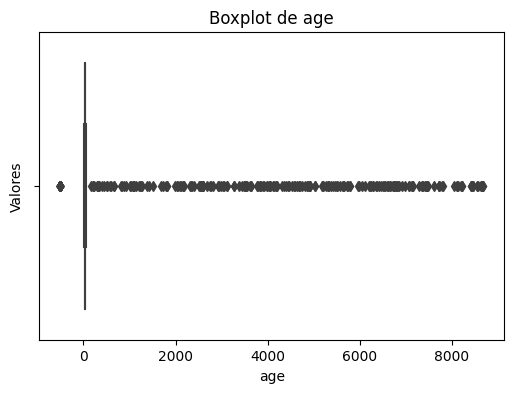

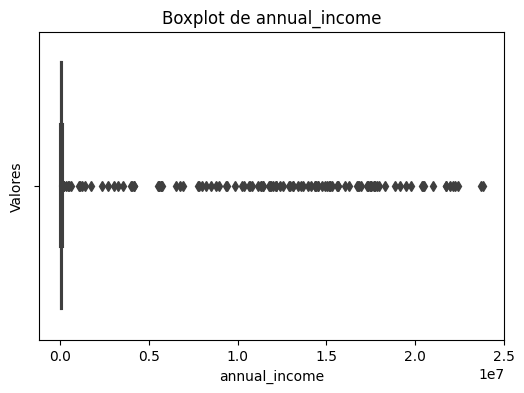

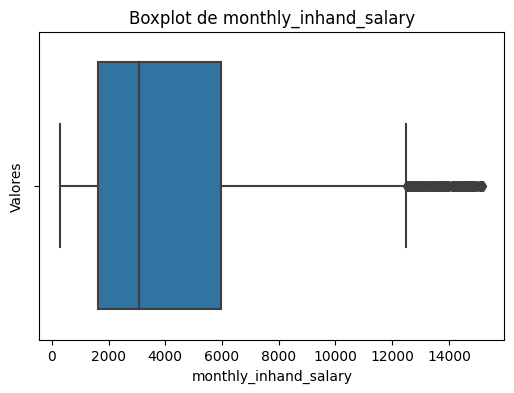

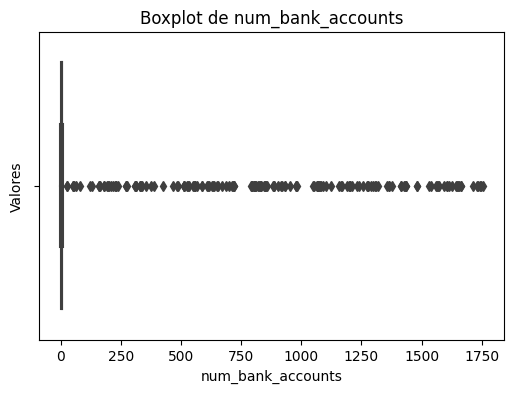

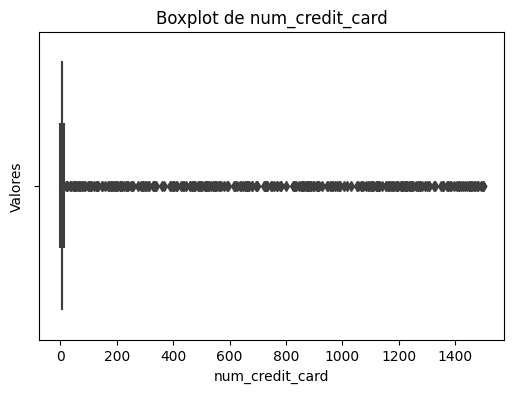

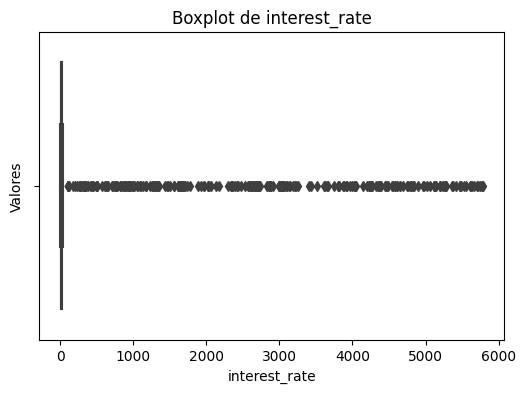

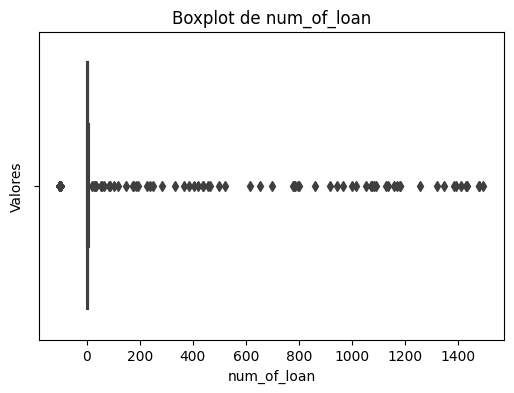

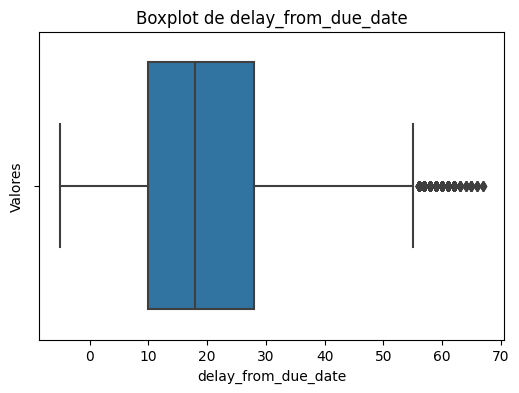

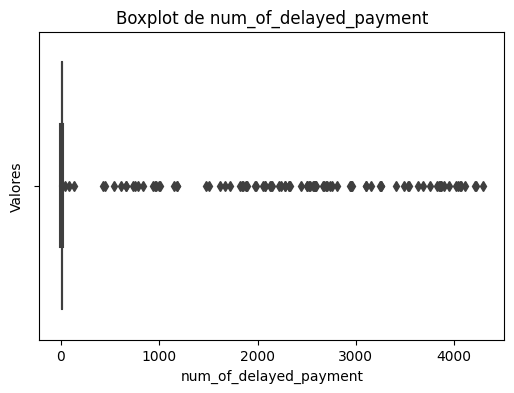

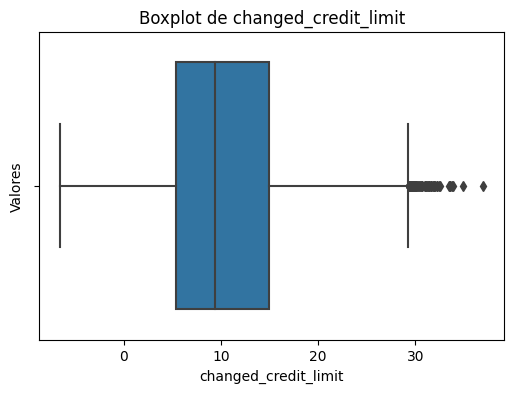

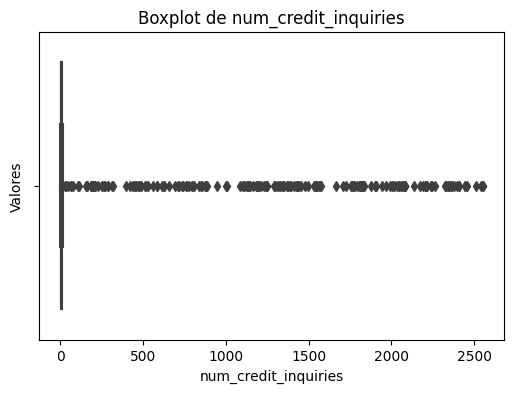

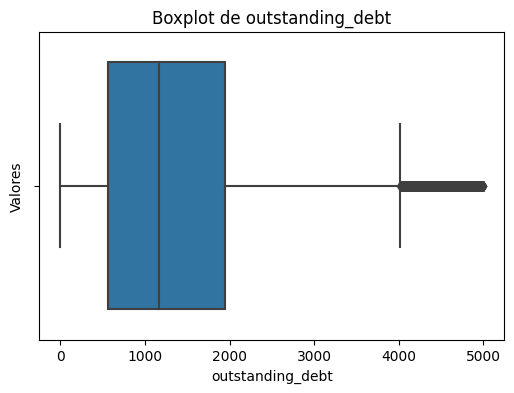

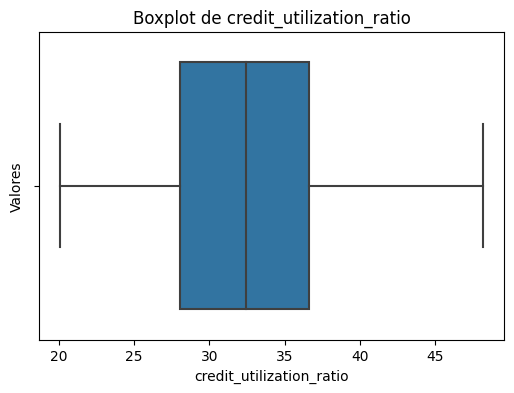

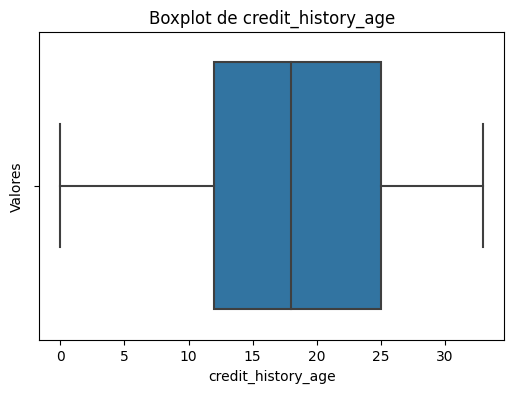

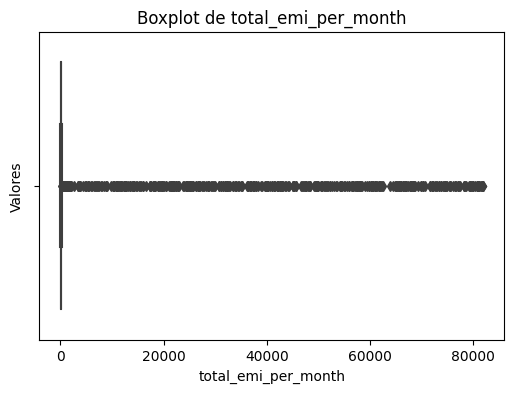

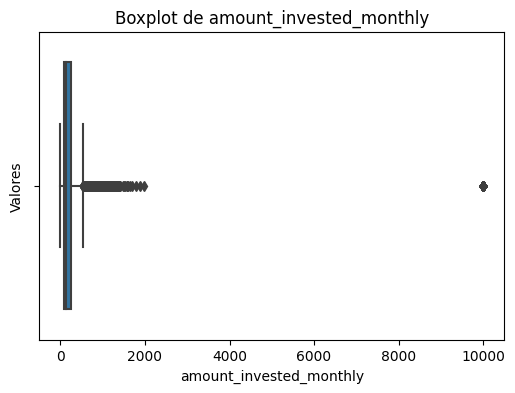

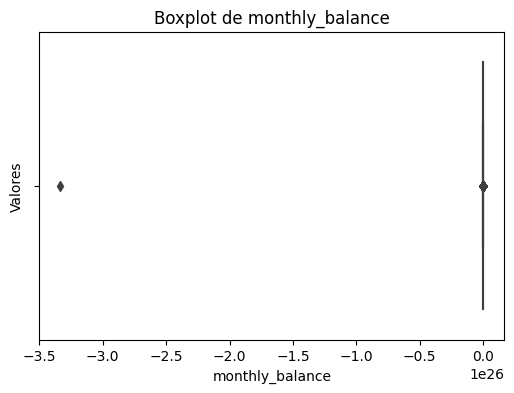

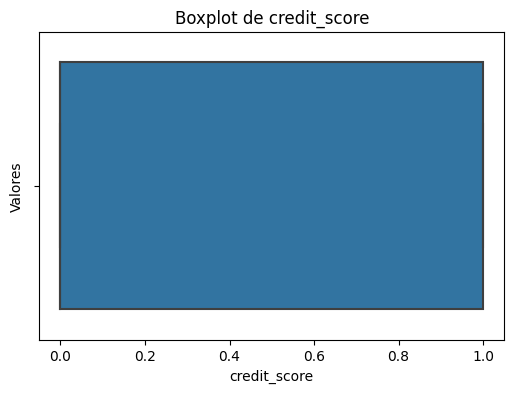

In [ ]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include='number').columns

# Crear boxplots para cada variable numérica por separado
for columna in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.xlabel(columna)
    plt.ylabel('Valores')
    plt.title(f'Boxplot de {columna}')
    plt.show()

## Análisis de la variable 'age'

In [ ]:
df[df['age']<0].shape

(104, 22)

In [ ]:
df[df['age']<0]['age'].unique()

array([-500.])

In [ ]:
df[df['age']>80].shape

(215, 22)

In [ ]:
df[df['age']>100]['age'].unique()

array([3052., 4431., 3115., 4670.,  395., 4049., 4710., 4351., 5784.,
       5645., 3513., 7805.,  831., 8105., 2823.,  886., 3553., 7068.,
       5504., 4820., 5194., 6556., 1203., 8043., 8628., 3791., 8216.,
        236., 5195., 3986., 7123., 5498., 7060., 8421., 7456., 7353.,
       4021.,  306., 1066., 4391., 2997., 3834., 3493., 6744., 7715.,
       7723., 4630., 5714., 3038., 4897., 6408., 5981., 6646., 8669.,
       6767.,  169., 1248., 6360., 5018.,  203., 2778., 7490., 1418.,
       4679., 5751., 2546., 6611.,  325.,  305., 8623., 1265., 1094.,
       2672., 8663., 1520., 4056., 7279., 5340.,  813., 5177.,  506.,
       4177., 2048., 6378., 5376., 3899., 5959., 2347., 2593., 4120.,
        655., 4746., 6909., 6506.,  581., 6663., 6657., 6588., 6516.,
       3984., 2513., 6280., 2170., 5471., 7131., 4133., 7459., 4881.,
       4909., 6283., 1220., 3920., 8442., 3764., 2749., 2329., 3638.,
       4536., 6189., 3502., 7618., 2038., 4592., 3537., 4458., 5643.,
       6219., 1990.,

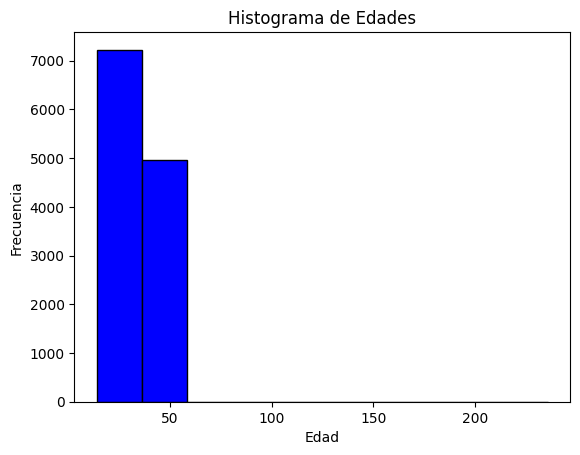

In [ ]:
plt.figure()
plt.hist(df[(df['age']<=300) & (df['age']>=0)]['age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()

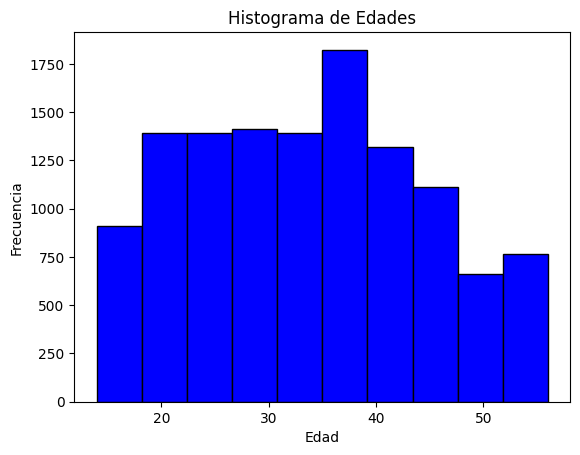

In [ ]:
plt.figure()
plt.hist(df[(df['age']<=100) & (df['age']>=0)]['age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()

In [ ]:
# Para ver la diferencia entre incluir valores entre 100 y 300
print(df[(df['age']<=300) & (df['age']>=0)].shape)
print(df[(df['age']<=100) & (df['age']>=0)].shape)

(12185, 22)
(12181, 22)


In [ ]:
# Para ver la diferencia entre incluir valores entre 100 y 200
print(df[(df['age']<=200) & (df['age']>=0)].shape)
print(df[(df['age']<=100) & (df['age']>=0)].shape)

(12182, 22)
(12181, 22)


In [ ]:
# Cuantos años tiene la persona que está entre 100 y 200 años
df[(df['age']<=200) & (df['age']>=100)]['age']

3580    169.0
Name: age, dtype: float64

En muy poco probable que una persona viva más de 120 años, por lo que en este caso todas las personas que vivan más de 100 se descartan del dataset original pues no corresponden a datos cercanos a la realidad.

In [ ]:
# Distribuciones de todos los clientes con
df[(df['credit_score']==0) & (df['age']>=0) & (df['age']<=100)].describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,8670.000000,8.670000e+03,7353.000000,8670.000000,8670.000000,8670.000000,8670.000000,8670.000000,8085.000000,8509.000000,8493.000000,8670.000000,8670.000000,7891.000000,8670.000000,8271.000000,8405.000000,8670.0
mean,34.330104,1.656659e+05,4476.928475,15.984660,22.815225,76.552826,2.711073,18.043599,33.047495,10.117834,25.663134,1193.579258,32.448391,19.778609,1553.708204,659.480370,421.928320,0.0
std,10.934168,1.286043e+06,3294.248642,112.022382,132.116996,494.853503,64.695886,13.067504,239.120347,6.614262,183.805157,1059.473550,5.163178,8.083000,8775.853819,2063.766991,221.055363,0.0
min,14.000000,7.006520e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.130000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,0.382558,0.0
25%,25.000000,2.097098e+04,1767.700833,3.000000,4.000000,7.000000,1.000000,8.000000,8.000000,5.200000,3.000000,463.942500,28.150423,15.000000,28.368793,75.428446,279.721045,0.0
50%,34.000000,3.983196e+04,3267.928333,5.000000,5.000000,11.000000,3.000000,15.000000,13.000000,9.200000,5.000000,947.855000,32.520371,20.000000,70.805275,140.433534,355.713484,0.0
75%,43.000000,7.969604e+04,6497.995000,7.000000,7.000000,18.000000,4.000000,25.000000,17.000000,14.170000,8.000000,1408.967500,36.723826,27.000000,169.477777,283.038513,503.012073,0.0
max,56.000000,2.383470e+07,15204.633333,1756.000000,1498.000000,5789.000000,1495.000000,66.000000,4293.000000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81935.000000,10000.000000,1463.792328,0.0


In [ ]:
df[(df['credit_score']==1) & (df['age']>=0) & (df['age']<=100)].describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,3511.000000,3.511000e+03,2974.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3276.000000,3424.000000,3436.000000,3511.000000,3511.000000,3202.000000,3511.000000,3348.000000,3.428000e+03,3511.0
mean,31.863287,1.527117e+05,3464.644014,19.540587,23.435204,62.756764,3.872401,28.522358,30.010989,11.123873,27.516007,1995.913136,32.098958,14.422861,1333.949501,583.889629,-9.723843e+22,1.0
std,10.141174,1.331081e+06,2725.704356,122.212910,128.848484,387.282135,64.400153,16.324086,215.147383,7.183366,174.503124,1180.316397,5.127552,7.544504,8056.093079,2001.437808,5.693225e+24,0.0
min,14.000000,7.005930e+03,319.556250,-1.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,-5.930000,0.000000,0.540000,20.244130,0.000000,0.000000,0.000000,-3.333333e+26,1.0
25%,24.000000,1.716364e+04,1413.160625,5.000000,5.000000,13.000000,2.000000,16.000000,11.000000,5.767500,6.000000,1254.175000,27.839065,9.000000,39.751958,70.819097,2.539543e+02,1.0
50%,32.000000,3.254338e+04,2705.460833,7.000000,6.000000,20.000000,4.000000,25.000000,16.000000,9.855000,9.000000,1821.390000,32.123568,14.000000,77.630937,121.542614,3.051881e+02,1.0
75%,40.000000,5.981598e+04,4904.254375,8.000000,8.000000,27.000000,6.000000,41.000000,20.000000,16.180000,12.000000,2576.620000,36.429337,19.000000,169.698801,222.561092,4.004060e+02,1.0
max,56.000000,2.371347e+07,15167.180000,1733.000000,1499.000000,5774.000000,1480.000000,67.000000,4211.000000,33.610000,2399.000000,4997.100000,46.230683,33.000000,81971.000000,10000.000000,1.351736e+03,1.0


## Análisis de variable num_banks_accounts

In [ ]:
df[df['num_bank_accounts']<=0]['num_bank_accounts'].unique()

array([ 0, -1])

In [ ]:
df[df['num_bank_accounts']==-1]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
3791,CUS_0x4f2a,40.0,Engineer,22136920.00,NaN,-1,6,1,2.0,10,...,6.0,1151.70,38.278518,22.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,0
5461,CUS_0xa878,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,27,...,1.0,607.78,34.041733,21.0,No,0.000000,467.415825,High_spent_Small_value_payments,779.676425,1
5901,CUS_0x43bc,36.0,Lawyer,22312.07,2013.339167,-1,3,4,3.0,9,...,3.0,51.37,30.059211,23.0,No,32.891186,23.003094,High_spent_Medium_value_payments,395.439637,0
6954,CUS_0x5993,41.0,Developer,30352.11,2317.342500,-1,4,7,1.0,8,...,0.0,644.57,32.937399,24.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,0


Que una persona tenga "-1" cuentas bancarias no hace sentido, y dado que son sólo cuatro filas con ese valor, también se limpiaran del dataset final

In [ ]:
df[df['num_bank_accounts']==0]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,4.0,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0
70,CUS_0x2827,18.0,Scientist,144546.72,NaN,0,3,7,2.0,13,...,1.0,1045.11,45.216910,23.0,No,1293.505449,226.508936,!@9#%8,1057.458508,0
74,CUS_0x6cbb,35.0,Media_Manager,72330.98,6300.581667,0,3,11,1.0,1,...,1.0,596.78,24.839283,33.0,No,31.379794,301.222518,Low_spent_Large_value_payments,567.455854,0
112,CUS_0x365a,54.0,_______,41345.58,3260.465000,0,5,10,0.0,7,...,7.0,646.47,23.744050,28.0,No,0.000000,101.590958,!@9#%8,494.455542,1
130,CUS_0x30e0,20.0,Entrepreneur,41735.55,3357.962500,0,3,8,4.0,15,...,3.0,1480.92,29.276217,NaN,NM,109.614147,240.589488,Low_spent_Medium_value_payments,265.592615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,CUS_0x41d3,43.0,Engineer,62976.28,5321.023333,0,3,12,0.0,11,...,3.0,68.66,35.678828,16.0,No,0.000000,545.166329,Low_spent_Medium_value_payments,NaN,0
12446,CUS_0x1b3b,49.0,Lawyer,76624.48,6123.373333,0,2,8,0.0,13,...,8.0,781.42,33.012713,18.0,No,0.000000,193.696889,High_spent_Medium_value_payments,NaN,0
12447,CUS_0x4c83,47.0,Scientist,39362.03,3485.169167,0,3,10,4.0,13,...,8.0,1283.75,27.260894,27.0,NM,121.773702,95.914134,High_spent_Medium_value_payments,NaN,0
12478,CUS_0x2c0a,45.0,Doctor,32625.59,2922.799167,0,5,8,4.0,7,...,8.0,177.90,36.543402,29.0,No,73.125008,123.766491,High_spent_Medium_value_payments,NaN,0


(12496, 22)


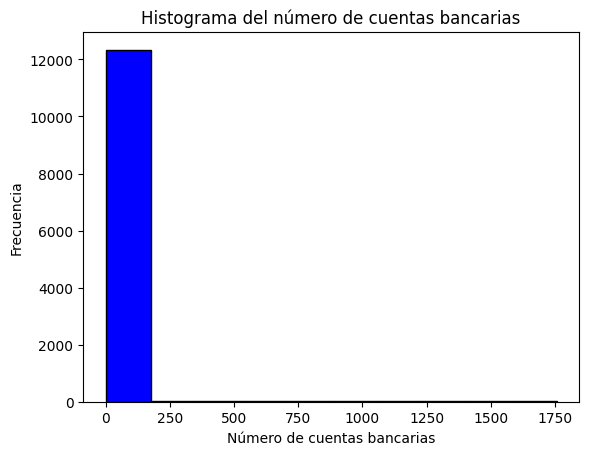

In [ ]:
print(df[df['num_bank_accounts']>=0].shape)

plt.figure()
plt.hist(df[df['num_bank_accounts']>=0]['num_bank_accounts'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de cuentas bancarias')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de cuentas bancarias')
plt.show()

(12370, 22)


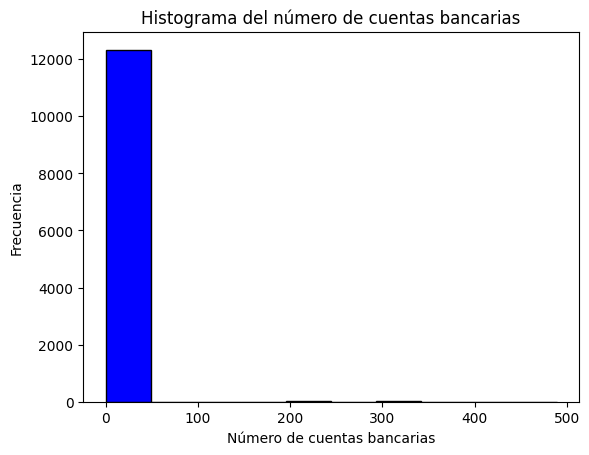

In [ ]:
print(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=500)].shape)

plt.figure()
plt.hist(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=500)]['num_bank_accounts'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de cuentas bancarias')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de cuentas bancarias')
plt.show()

(12336, 22)


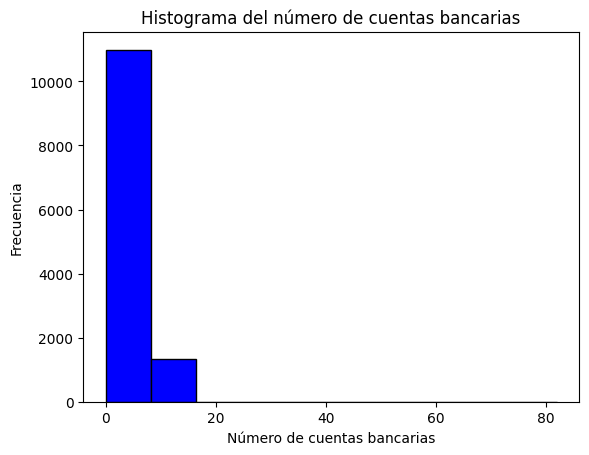

In [ ]:
print(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=100)].shape)

plt.figure()
plt.hist(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=100)]['num_bank_accounts'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de cuentas bancarias')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de cuentas bancarias')
plt.show()

(12331, 22)


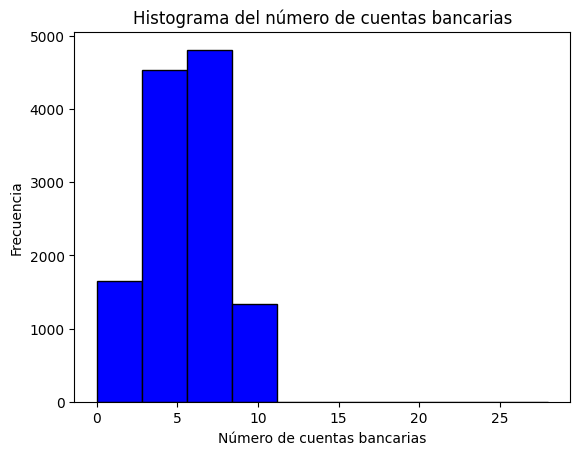

In [ ]:
print(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=40)].shape)

plt.figure()
plt.hist(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=40)]['num_bank_accounts'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de cuentas bancarias')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de cuentas bancarias')
plt.show()

(12329, 22)


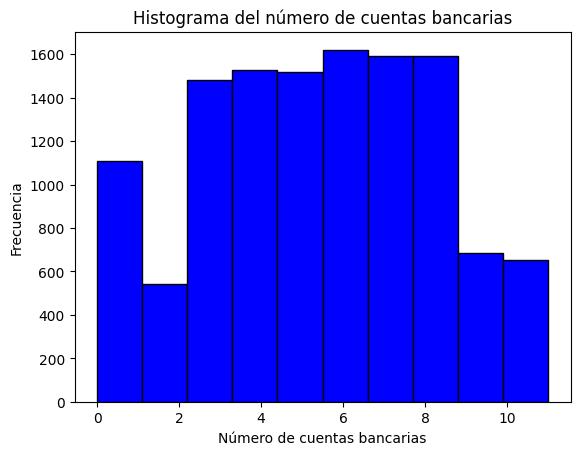

In [ ]:
print(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=20)].shape)

plt.figure()
plt.hist(df[(df['num_bank_accounts']>=0) & (df['num_bank_accounts']<=20)]['num_bank_accounts'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de cuentas bancarias')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de cuentas bancarias')
plt.show()

## Análisis de variable num_credit_card

(12500, 22)


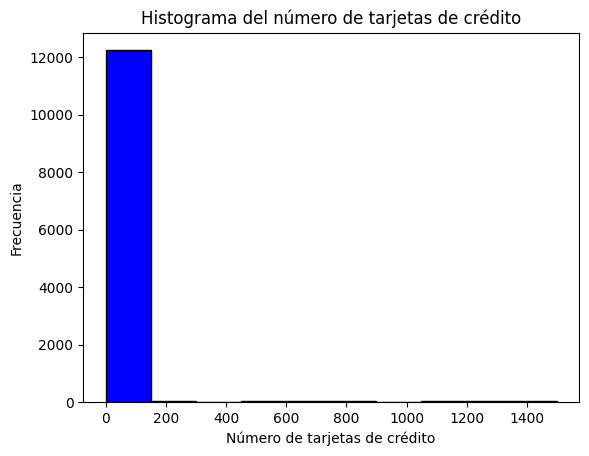

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['num_credit_card'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de tarjetas de crédito')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de tarjetas de crédito')
plt.show()

(12249, 22)


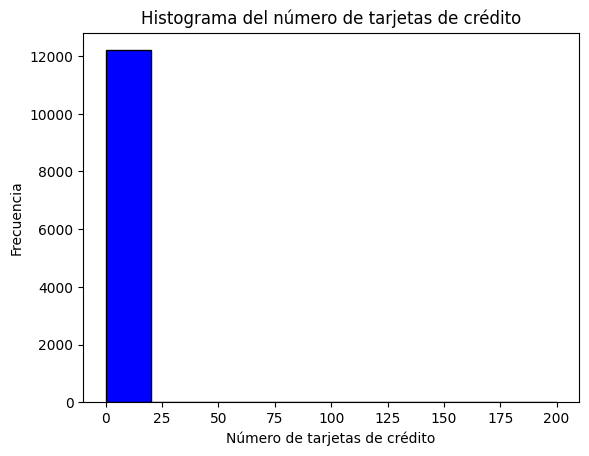

In [ ]:
print(df[df['num_credit_card']<=200].shape)

plt.figure()
plt.hist(df[df['num_credit_card']<=200]['num_credit_card'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de tarjetas de crédito')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de tarjetas de crédito')
plt.show()

(12225, 22)


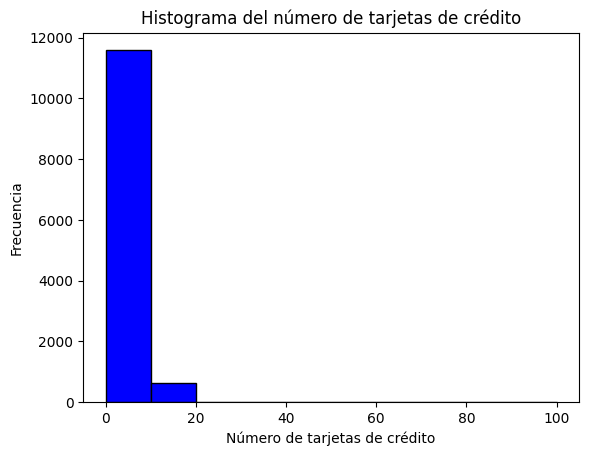

In [ ]:
print(df[df['num_credit_card']<=100].shape)

plt.figure()
plt.hist(df[df['num_credit_card']<=100]['num_credit_card'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de tarjetas de crédito')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de tarjetas de crédito')
plt.show()

(12211, 22)


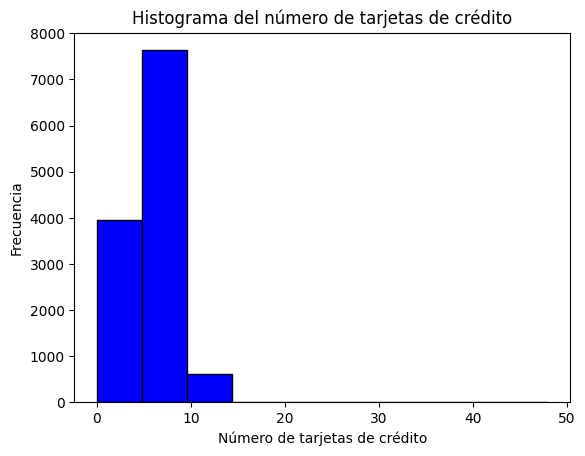

In [ ]:
print(df[df['num_credit_card']<=50].shape)

plt.figure()
plt.hist(df[df['num_credit_card']<=50]['num_credit_card'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de tarjetas de crédito')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de tarjetas de crédito')
plt.show()

(12207, 22)


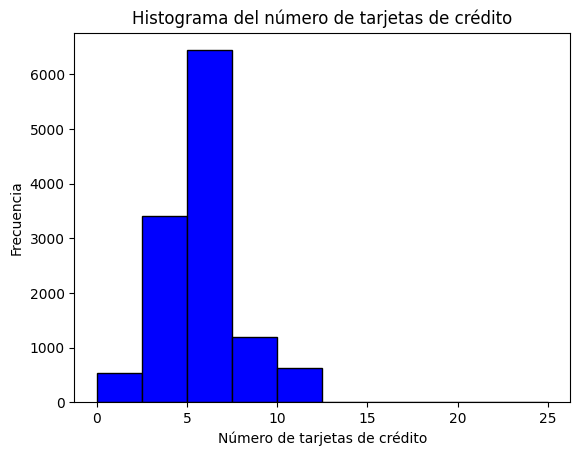

In [ ]:
print(df[df['num_credit_card']<=30].shape)

plt.figure()
plt.hist(df[df['num_credit_card']<=30]['num_credit_card'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de tarjetas de crédito')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de tarjetas de crédito')
plt.show()

(12204, 22)


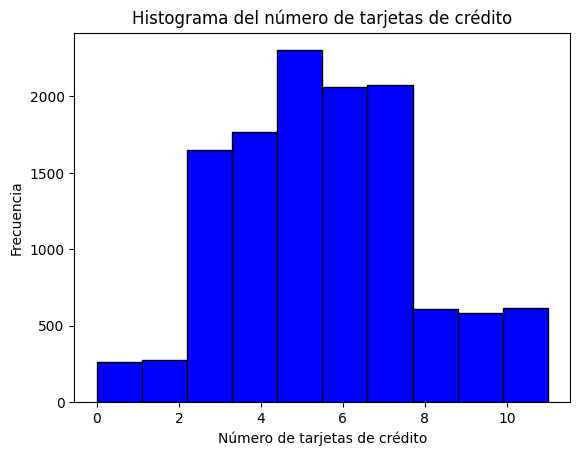

In [ ]:
print(df[df['num_credit_card']<=20].shape)

plt.figure()
plt.hist(df[df['num_credit_card']<=20]['num_credit_card'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de tarjetas de crédito')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de tarjetas de crédito')
plt.show()

## Análisis de la variable interest_rate

(12500, 22)


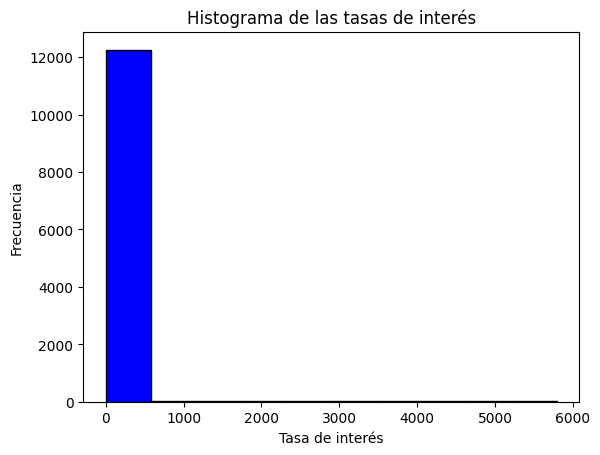

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['interest_rate'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Tasa de interés')
plt.ylabel('Frecuencia')
plt.title('Histograma de las tasas de interés')
plt.show()

(12293, 22)


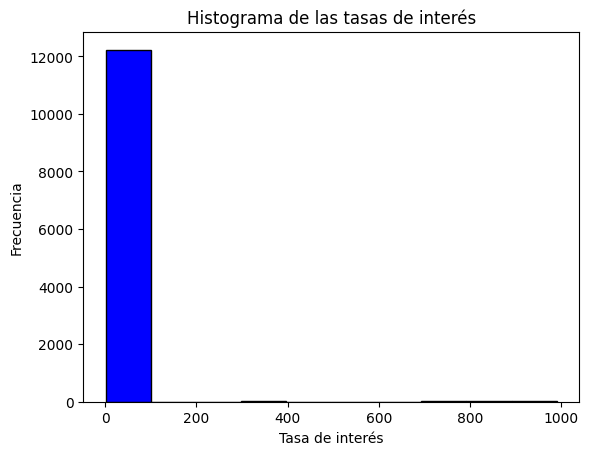

In [ ]:
print(df[df['interest_rate']<=1000].shape)

plt.figure()
plt.hist(df[df['interest_rate']<=1000]['interest_rate'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Tasa de interés')
plt.ylabel('Frecuencia')
plt.title('Histograma de las tasas de interés')
plt.show()

(12237, 22)


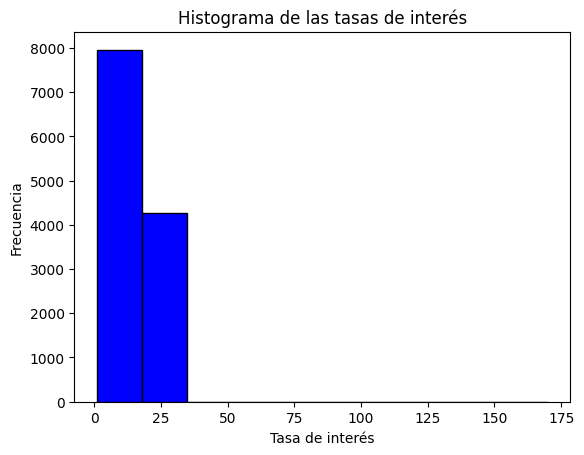

In [ ]:
print(df[df['interest_rate']<=200].shape)

plt.figure()
plt.hist(df[df['interest_rate']<=200]['interest_rate'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Tasa de interés')
plt.ylabel('Frecuencia')
plt.title('Histograma de las tasas de interés')
plt.show()

(12232, 22)


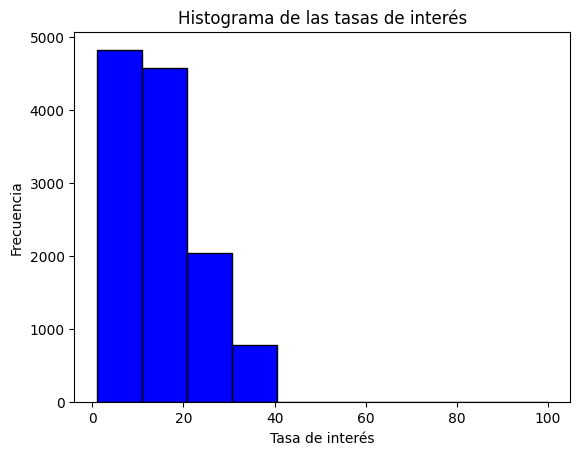

In [ ]:
print(df[df['interest_rate']<=100].shape)

plt.figure()
plt.hist(df[df['interest_rate']<=100]['interest_rate'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Tasa de interés')
plt.ylabel('Frecuencia')
plt.title('Histograma de las tasas de interés')
plt.show()

(12230, 22)


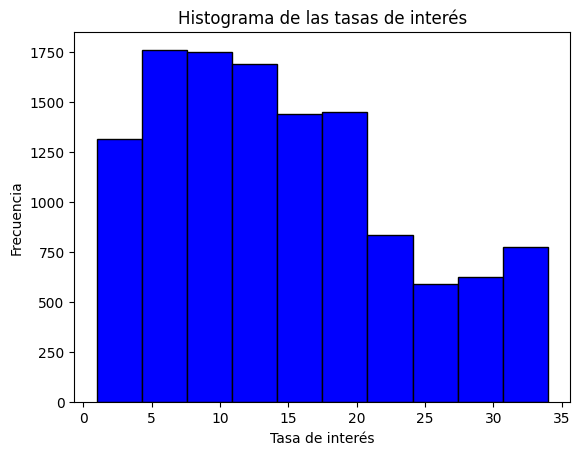

In [ ]:
print(df[df['interest_rate']<=50].shape)

plt.figure()
plt.hist(df[df['interest_rate']<=50]['interest_rate'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Tasa de interés')
plt.ylabel('Frecuencia')
plt.title('Histograma de las tasas de interés')
plt.show()

## Análisis de la variable num_of_loan

In [ ]:
df[df['num_of_loan']<0].shape

(500, 22)

In [ ]:
df[df['num_of_loan']<0]['num_of_loan'].unique()

array([-100.])

(12500, 22)


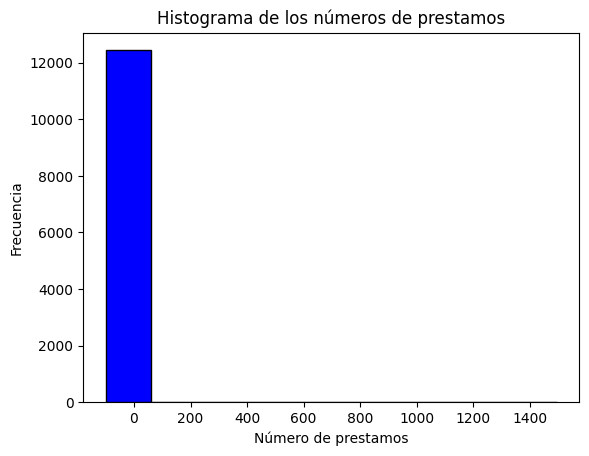

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['num_of_loan'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de prestamos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números de prestamos')
plt.show()

(12000, 22)


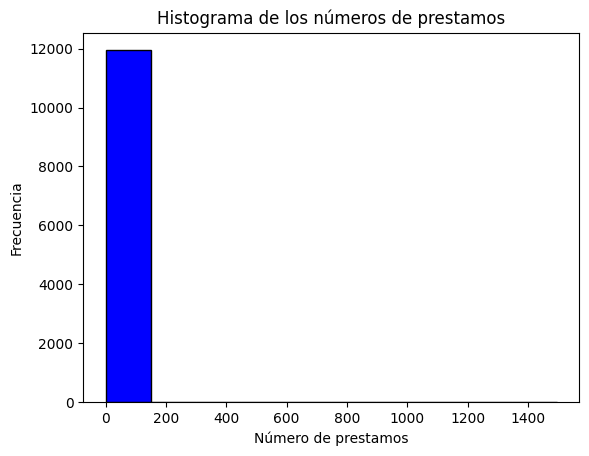

In [ ]:
print(df[df['num_of_loan']>=0].shape)

plt.figure()
plt.hist(df[df['num_of_loan']>=0]['num_of_loan'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de prestamos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números de prestamos')
plt.show()

(11949, 22)


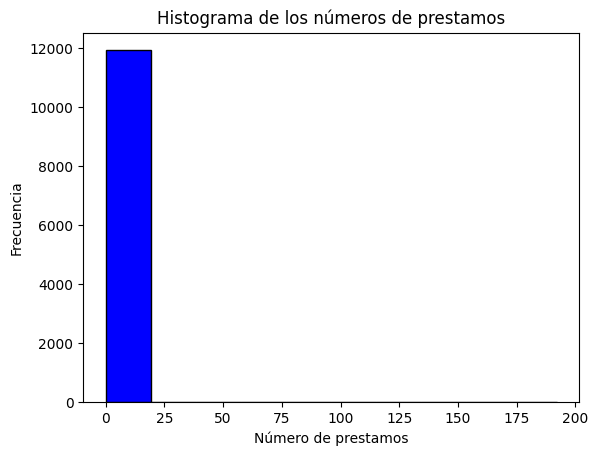

In [ ]:
print(df[(df['num_of_loan']>=0) & (df['num_of_loan']<=200)].shape)

plt.figure()
plt.hist(df[(df['num_of_loan']>=0) & (df['num_of_loan']<=200)]['num_of_loan'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de prestamos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números de prestamos')
plt.show()

(11937, 22)


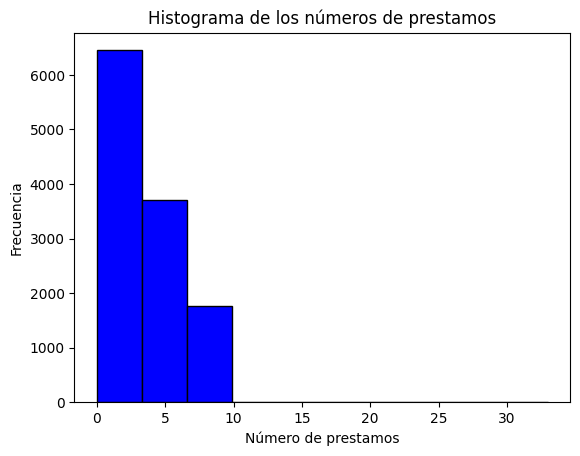

In [ ]:
print(df[(df['num_of_loan']>=0) & (df['num_of_loan']<=50)].shape)

plt.figure()
plt.hist(df[(df['num_of_loan']>=0) & (df['num_of_loan']<=50)]['num_of_loan'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de prestamos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números de prestamos')
plt.show()

(11933, 22)


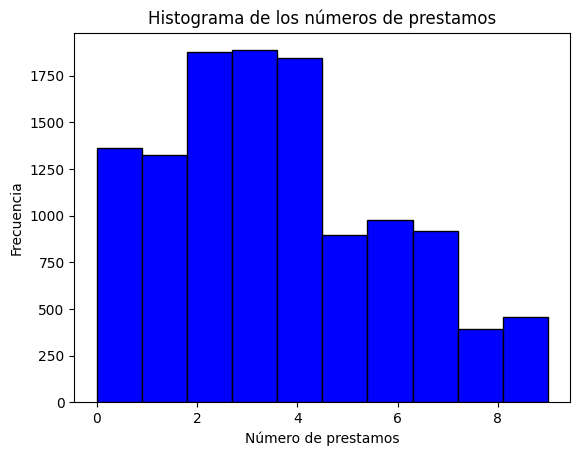

In [ ]:
print(df[(df['num_of_loan']>=0) & (df['num_of_loan']<=15)].shape)

plt.figure()
plt.hist(df[(df['num_of_loan']>=0) & (df['num_of_loan']<=15)]['num_of_loan'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de prestamos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números de prestamos')
plt.show()

## Analisis de la variable delay_from_due_date

(12500, 22)


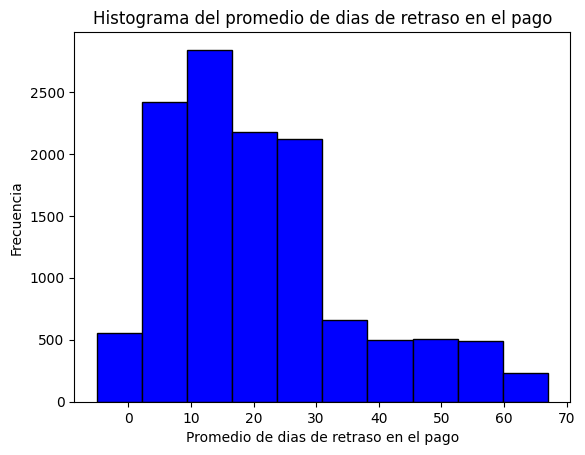

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['delay_from_due_date'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Promedio de dias de retraso en el pago')
plt.ylabel('Frecuencia')
plt.title('Histograma del promedio de dias de retraso en el pago')
plt.show()

## Analisis de la variable num_of_delayed_payment

11660


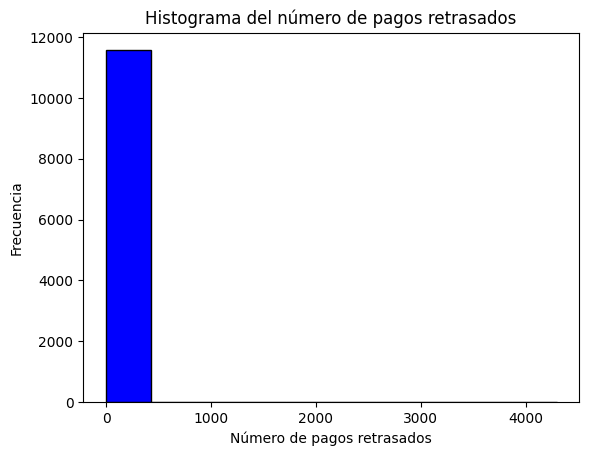

In [ ]:
print(df['num_of_delayed_payment'].count())

plt.figure()
plt.hist(df['num_of_delayed_payment'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de pagos retrasados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de pagos retrasados')
plt.show()

11580


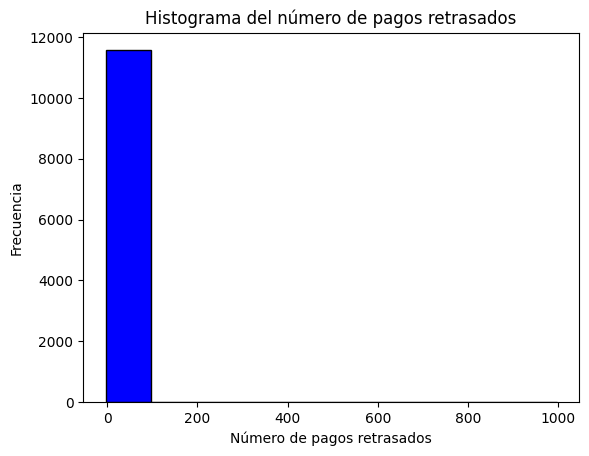

In [ ]:
print(df[df['num_of_delayed_payment']<=1000]['num_of_delayed_payment'].count())

plt.figure()
plt.hist(df[df['num_of_delayed_payment']<=1000]['num_of_delayed_payment'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de pagos retrasados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de pagos retrasados')
plt.show()

11566


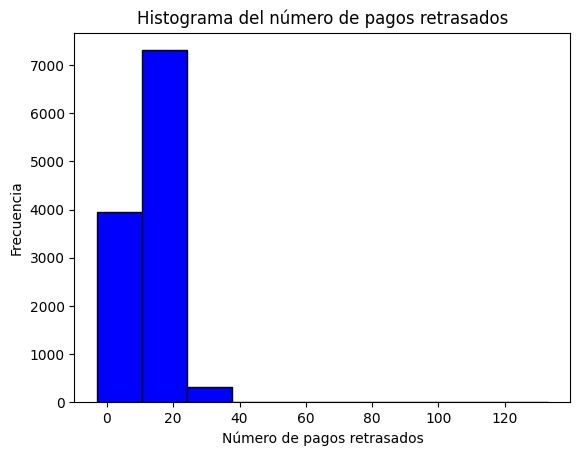

In [ ]:
print(df[df['num_of_delayed_payment']<=200]['num_of_delayed_payment'].count())

plt.figure()
plt.hist(df[df['num_of_delayed_payment']<=200]['num_of_delayed_payment'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de pagos retrasados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de pagos retrasados')
plt.show()

11564


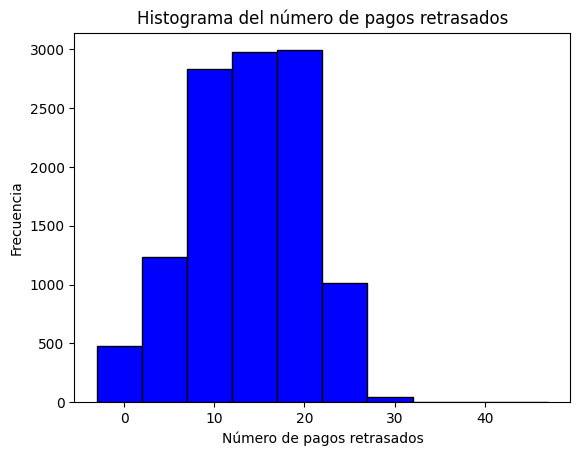

In [ ]:
print(df[df['num_of_delayed_payment']<=60]['num_of_delayed_payment'].count())

plt.figure()
plt.hist(df[df['num_of_delayed_payment']<=60]['num_of_delayed_payment'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de pagos retrasados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de pagos retrasados')
plt.show()

11563


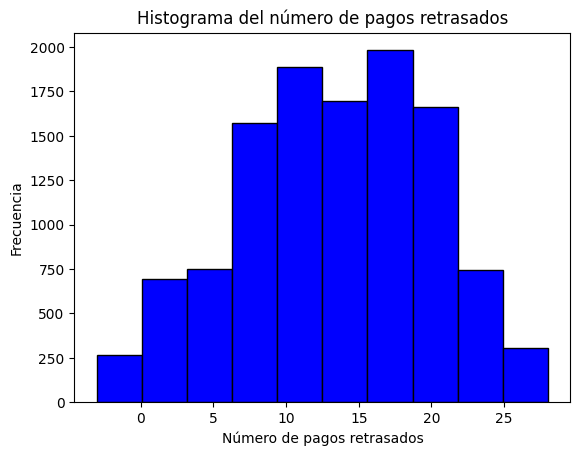

In [ ]:
print(df[df['num_of_delayed_payment']<=40]['num_of_delayed_payment'].count())

plt.figure()
plt.hist(df[df['num_of_delayed_payment']<=40]['num_of_delayed_payment'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Número de pagos retrasados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de pagos retrasados')
plt.show()

## Analisis de la variable changed_credit_limit

(12500, 22)


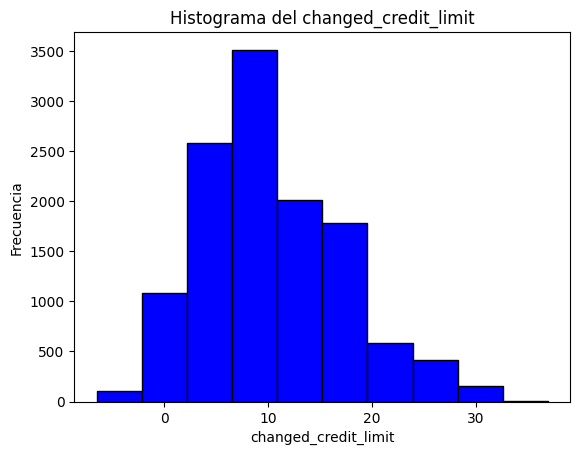

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['changed_credit_limit'], bins=10, color='blue', edgecolor='black')
plt.xlabel('changed_credit_limit')
plt.ylabel('Frecuencia')
plt.title('Histograma del changed_credit_limit')
plt.show()

## Analisis de la variable num_credit_inquiries

(12500, 22)


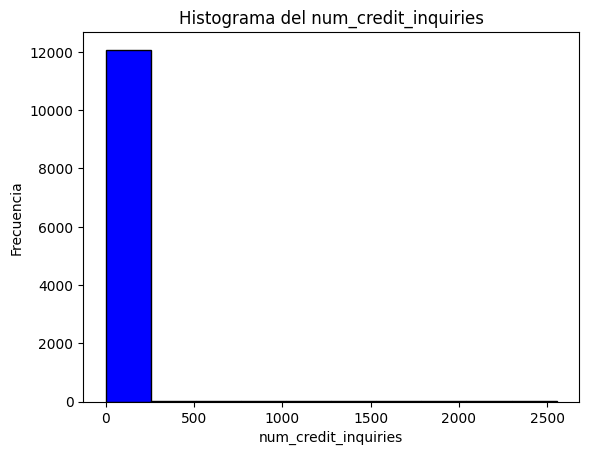

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['num_credit_inquiries'], bins=10, color='blue', edgecolor='black')
plt.xlabel('num_credit_inquiries')
plt.ylabel('Frecuencia')
plt.title('Histograma del num_credit_inquiries')
plt.show()

(12093, 22)


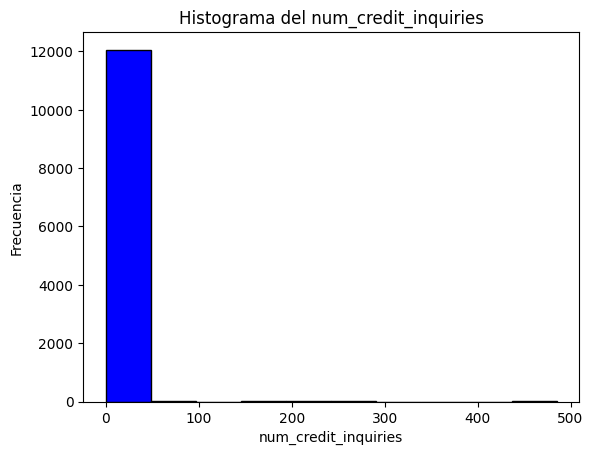

In [ ]:
print(df[df['num_credit_inquiries']<=500].shape)

plt.figure()
plt.hist(df[df['num_credit_inquiries']<=500]['num_credit_inquiries'], bins=10, color='blue', edgecolor='black')
plt.xlabel('num_credit_inquiries')
plt.ylabel('Frecuencia')
plt.title('Histograma del num_credit_inquiries')
plt.show()

(12081, 22)


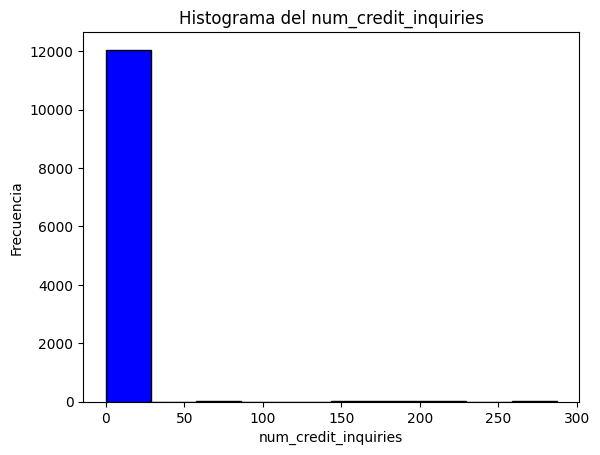

In [ ]:
print(df[df['num_credit_inquiries']<=300].shape)

plt.figure()
plt.hist(df[df['num_credit_inquiries']<=300]['num_credit_inquiries'], bins=10, color='blue', edgecolor='black')
plt.xlabel('num_credit_inquiries')
plt.ylabel('Frecuencia')
plt.title('Histograma del num_credit_inquiries')
plt.show()

(12061, 22)


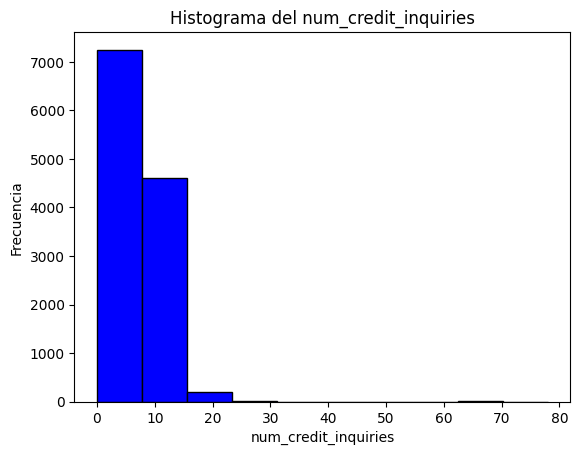

In [ ]:
print(df[df['num_credit_inquiries']<=100].shape)

plt.figure()
plt.hist(df[df['num_credit_inquiries']<=100]['num_credit_inquiries'], bins=10, color='blue', edgecolor='black')
plt.xlabel('num_credit_inquiries')
plt.ylabel('Frecuencia')
plt.title('Histograma del num_credit_inquiries')
plt.show()

(12058, 22)


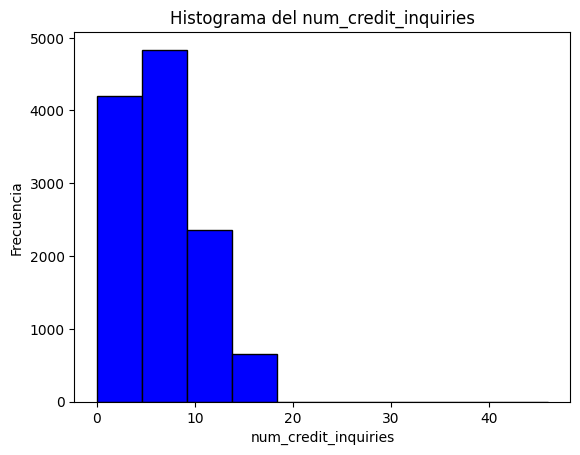

In [ ]:
print(df[df['num_credit_inquiries']<=50].shape)

plt.figure()
plt.hist(df[df['num_credit_inquiries']<=50]['num_credit_inquiries'], bins=10, color='blue', edgecolor='black')
plt.xlabel('num_credit_inquiries')
plt.ylabel('Frecuencia')
plt.title('Histograma del num_credit_inquiries')
plt.show()

(12055, 22)


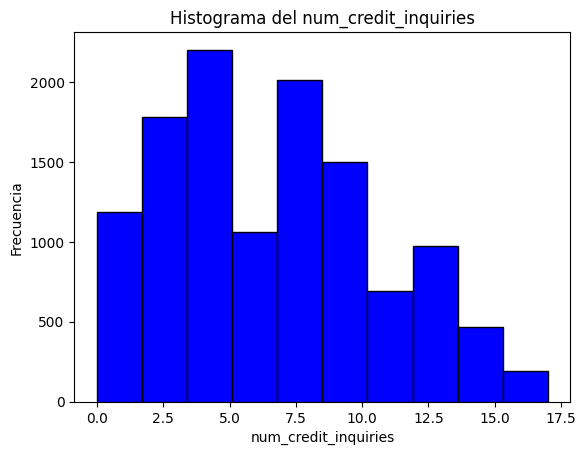

In [ ]:
print(df[df['num_credit_inquiries']<=25].shape)

plt.figure()
plt.hist(df[df['num_credit_inquiries']<=25]['num_credit_inquiries'], bins=10, color='blue', edgecolor='black')
plt.xlabel('num_credit_inquiries')
plt.ylabel('Frecuencia')
plt.title('Histograma del num_credit_inquiries')
plt.show()

## Analisis de la variable 	outstanding_debt

(12500, 22)


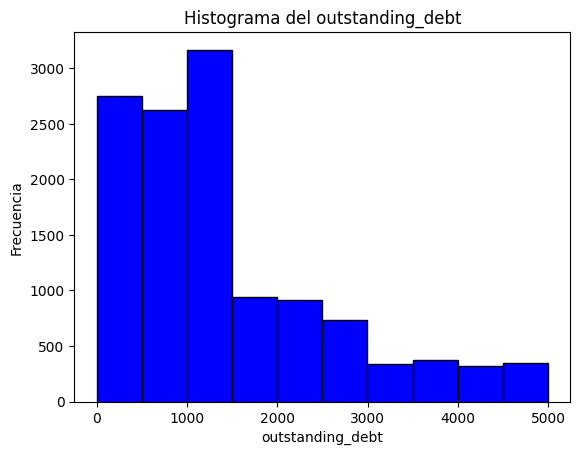

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['outstanding_debt'], bins=10, color='blue', edgecolor='black')
plt.xlabel('outstanding_debt')
plt.ylabel('Frecuencia')
plt.title('Histograma del outstanding_debt')
plt.show()

## Analisis de la variable credit_utilization_ratio

(12500, 22)


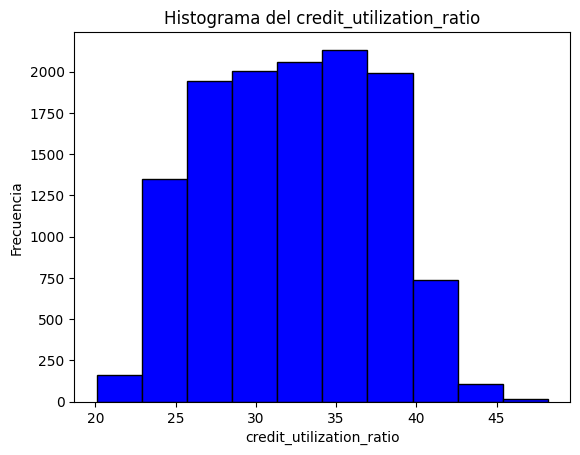

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['credit_utilization_ratio'], bins=10, color='blue', edgecolor='black')
plt.xlabel('credit_utilization_ratio')
plt.ylabel('Frecuencia')
plt.title('Histograma del credit_utilization_ratio')
plt.show()

## Analisis de la variable credit_history_age

(12500, 22)


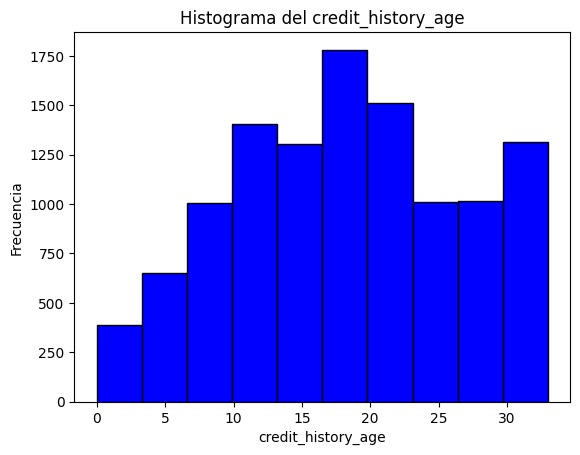

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['credit_history_age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('credit_history_age')
plt.ylabel('Frecuencia')
plt.title('Histograma del credit_history_age')
plt.show()

## Analisis de la variable total_emi_per_month

(12500, 22)


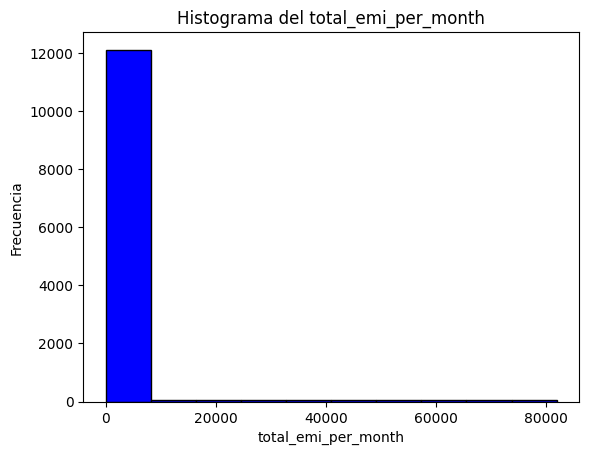

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['total_emi_per_month'], bins=10, color='blue', edgecolor='black')
plt.xlabel('total_emi_per_month')
plt.ylabel('Frecuencia')
plt.title('Histograma del total_emi_per_month')
plt.show()

(12183, 22)


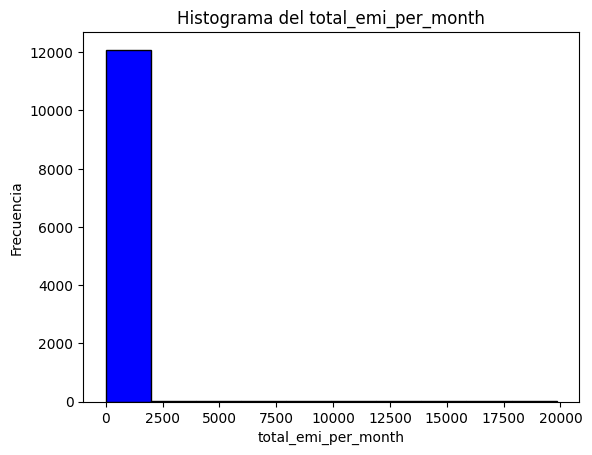

In [ ]:
print(df[df['total_emi_per_month']<=20000].shape)

plt.figure()
plt.hist(df[df['total_emi_per_month']<=20000]['total_emi_per_month'], bins=10, color='blue', edgecolor='black')
plt.xlabel('total_emi_per_month')
plt.ylabel('Frecuencia')
plt.title('Histograma del total_emi_per_month')
plt.show()

(12124, 22)


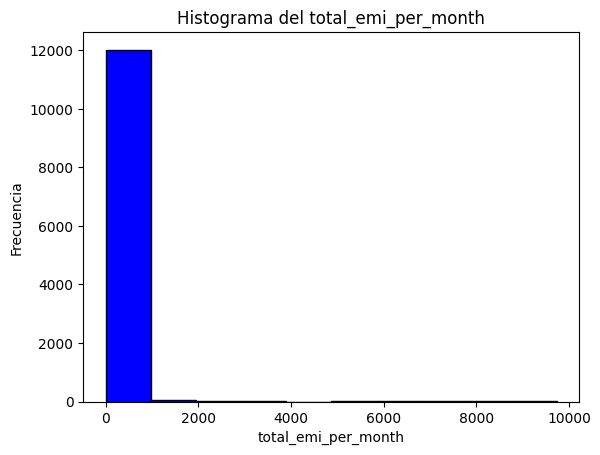

In [ ]:
print(df[df['total_emi_per_month']<=10000].shape)

plt.figure()
plt.hist(df[df['total_emi_per_month']<=10000]['total_emi_per_month'], bins=10, color='blue', edgecolor='black')
plt.xlabel('total_emi_per_month')
plt.ylabel('Frecuencia')
plt.title('Histograma del total_emi_per_month')
plt.show()

(12102, 22)


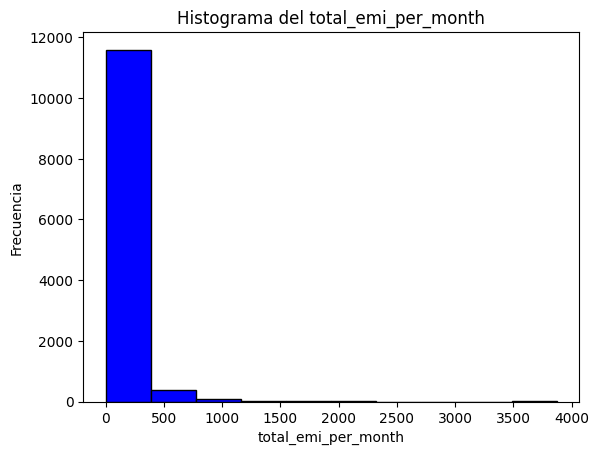

In [ ]:
print(df[df['total_emi_per_month']<=4000].shape)

plt.figure()
plt.hist(df[df['total_emi_per_month']<=4000]['total_emi_per_month'], bins=10, color='blue', edgecolor='black')
plt.xlabel('total_emi_per_month')
plt.ylabel('Frecuencia')
plt.title('Histograma del total_emi_per_month')
plt.show()

(12092, 22)


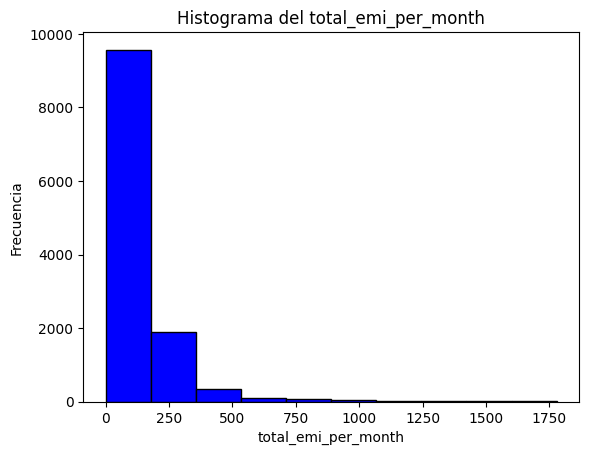

In [ ]:
print(df[df['total_emi_per_month']<=2000].shape)

plt.figure()
plt.hist(df[df['total_emi_per_month']<=2000]['total_emi_per_month'], bins=10, color='blue', edgecolor='black')
plt.xlabel('total_emi_per_month')
plt.ylabel('Frecuencia')
plt.title('Histograma del total_emi_per_month')
plt.show()

(12030, 22)


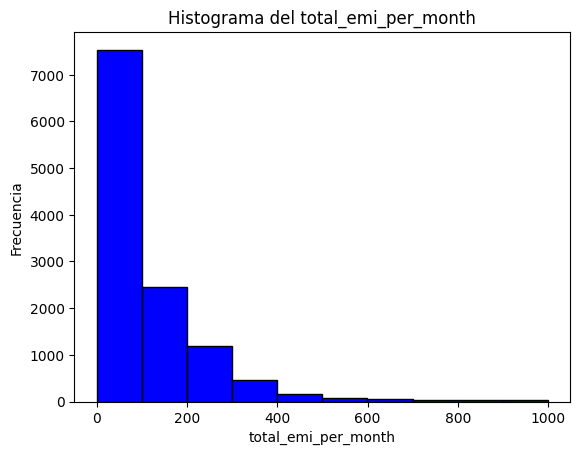

In [ ]:
print(df[df['total_emi_per_month']<=1000].shape)

plt.figure()
plt.hist(df[df['total_emi_per_month']<=1000]['total_emi_per_month'], bins=10, color='blue', edgecolor='black')
plt.xlabel('total_emi_per_month')
plt.ylabel('Frecuencia')
plt.title('Histograma del total_emi_per_month')
plt.show()

## Analisis de la variable amount_invested_monthly

(12500, 22)


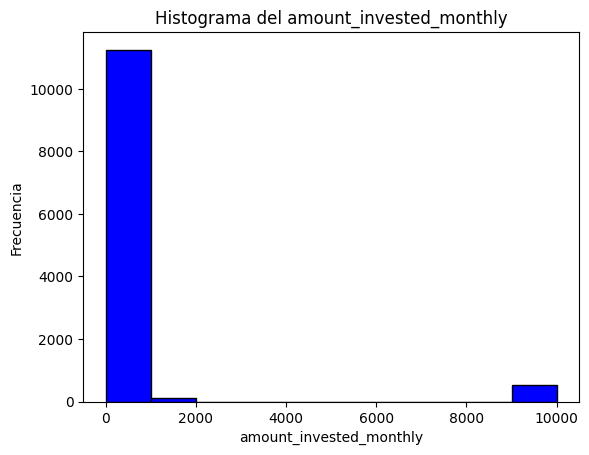

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['amount_invested_monthly'], bins=10, color='blue', edgecolor='black')
plt.xlabel('amount_invested_monthly')
plt.ylabel('Frecuencia')
plt.title('Histograma del amount_invested_monthly')
plt.show()

(11374, 22)


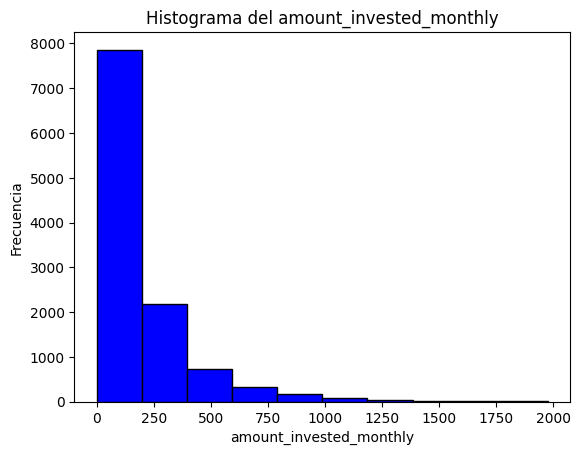

In [ ]:
print(df[df['amount_invested_monthly']<=2000].shape)

plt.figure()
plt.hist(df[df['amount_invested_monthly']<=2000]['amount_invested_monthly'], bins=10, color='blue', edgecolor='black')
plt.xlabel('amount_invested_monthly')
plt.ylabel('Frecuencia')
plt.title('Histograma del amount_invested_monthly')
plt.show()

## Analisis de la variable monthly_balance

(12500, 22)


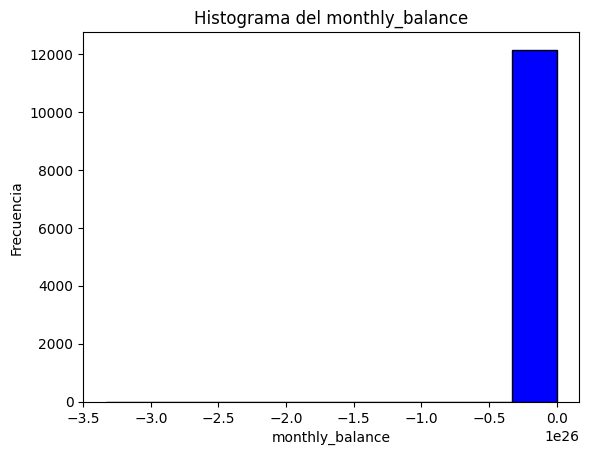

In [ ]:
print(df.shape)

plt.figure()
plt.hist(df['monthly_balance'], bins=10, color='blue', edgecolor='black')
plt.xlabel('monthly_balance')
plt.ylabel('Frecuencia')
plt.title('Histograma del monthly_balance')
plt.show()

(12144, 22)


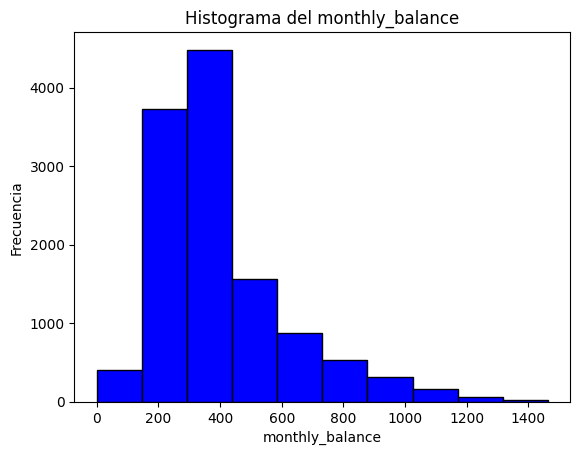

In [ ]:
print(df[df['monthly_balance']>=0].shape)

plt.figure()
plt.hist(df[df['monthly_balance']>=0]['monthly_balance'], bins=10, color='blue', edgecolor='black')
plt.xlabel('monthly_balance')
plt.ylabel('Frecuencia')
plt.title('Histograma del monthly_balance')
plt.show()

# 3. Preparación de datos

En base al EDA realizado en la sección anterior, se encontraron anomalías para algunas de las variables, como es el caso de 'age' donde aparecían valores negativos y valores alejados de la realidad (edades superiores a los 160 años), también en el caso del número de cuentas bancarias del cliente (valores negativos), en la variable 'interest_rate' donde se encontraban valores excesivamente grandes, y en la variable 'num_of_loan' donde se encontraron valores negativos y unos excesivamente grandes. En base al análisis de cada una de estas variables, se decidió acotar cada uno de los rangos de ellas según la intución y conocimiento del negocio.

In [128]:
df_f = df[(df['age'] >= 0) & (df['age'] <= 100)] # Edades entre 0 (desde los 14 años) y 100 años
df_f = df_f[(df_f['num_bank_accounts']>=0) & (df_f['num_bank_accounts']<=20)]
df_f = df_f[df_f['num_credit_card']<=20]
df_f = df_f[df_f['interest_rate']<=50]
df_f = df_f[(df_f['num_of_loan']>=0) & (df_f['num_of_loan']<=15)]
df_f = df_f[df_f['num_of_delayed_payment']<=40]
df_f = df_f[df_f['num_credit_inquiries']<=25]
df_f = df_f[df_f['total_emi_per_month']<=1000]
df_f = df_f[df_f['amount_invested_monthly']<=2000]
df_f = df_f[df_f['monthly_balance']>=0]


In [129]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [130]:
df_f.dtypes

customer_id                  object
age                         float64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                 float64
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

## 3.1 Preprocesamiento con `ColumnTransformer`

- Convierta las columnas mal leidas a sus tipos correspondientes (float, str, etc...)
- Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

- Luego, pruebe las transformaciones utilizando `fit_transform`.

- Posteriormente, ejecute un Holdout que le permita más adelante evaluar los modelos.

Se hace la correción de los tipos de variables que realmente correspondan

In [131]:
df_f['age'] = df_f['age'].astype('int16')
df_f['num_of_loan'] = df_f['num_of_loan'].astype('int16')
df_f['num_of_delayed_payment'] = df_f['num_of_delayed_payment'].astype('int16')
df_f['num_credit_inquiries'] = df_f['num_credit_inquiries'].astype('int16')

In [132]:
df_f.dtypes

customer_id                  object
age                           int16
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int16
delay_from_due_date           int64
num_of_delayed_payment        int16
changed_credit_limit        float64
num_credit_inquiries          int16
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

In [133]:
#set_config(transform_output="default")

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_columns = ['occupation', 'payment_of_min_amount']

standard_scaler = StandardScaler()
standard_columns = ['age', 'num_bank_accounts', 'num_credit_card', 'credit_utilization_ratio']

minmax_scaler = MinMaxScaler()
minmax_columns = ['annual_income', 'monthly_inhand_salary', 'interest_rate', 'num_of_loan', 'delay_from_due_date',
                  'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_history_age',
                  'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']

ordinal_transformer = OrdinalEncoder(categories=[['!@9#%8', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments',
                                                  'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']])
ordinal_columns = ['payment_behaviour']

preprocessor = ColumnTransformer(
    transformers=[('Categorical', categorical_transformer, categorical_columns),
                  ('Ordinal', ordinal_transformer, ordinal_columns),
                  ('Standard Scaler', standard_scaler, standard_columns),
                  ('MinMax Scaler', minmax_scaler, minmax_columns)
                  ])

preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('Categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['occupation', 'payment_of_min_amount']),
                                ('Ordinal',
                                 OrdinalEncoder(categories=[['!@9#%8',
                                                             'Low_spent_Small_value_payments',
                                                             'Low_spent_Medium_value_payments',
                                                             'Low_spent_Large_value_payments',
                                                             'High_spent_Small_value_payments',
                                                             'High_spent_Medium_val...
                                 ['age', 'num_bank_accounts', 'num_credit_card',
                                  'credit_utilization_ratio']),
                                ('MinMax Scaler', MinMaxScaler(),
                                 ['annual_income', 'monthly_inhand_salary',
                                  'interest_rate', 'num_of_loan',
                                  'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries', 'outstanding_debt',
                                  'credit_history_age', 'total_emi_per_month',
                                  'amount_invested_monthly',
                                  'monthly_balance'])])

## 3.2 Holdout

In [134]:
X = df_f.drop(columns=['credit_score'])
y = df_f['credit_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
target_names = ['CREDIT', 'NOCREDIT']

## 3.3 Datos nulos.

In [135]:
X.isna().sum().sort_values(ascending=False)

monthly_inhand_salary       1267
credit_history_age           753
changed_credit_limit         177
customer_id                    0
payment_behaviour              0
amount_invested_monthly        0
total_emi_per_month            0
payment_of_min_amount          0
credit_utilization_ratio       0
outstanding_debt               0
num_credit_inquiries           0
num_of_delayed_payment         0
age                            0
delay_from_due_date            0
num_of_loan                    0
interest_rate                  0
num_credit_card                0
num_bank_accounts              0
annual_income                  0
occupation                     0
monthly_balance                0
dtype: int64

In [136]:
null_columns = X.columns[X.isna().any()]

imputer = make_column_transformer(
    (
        SimpleImputer(strategy="median", add_indicator=True),
        null_columns,
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

imputer.set_output(transform="pandas")
X_imputed = imputer.fit_transform(X)
X_imputed.head()

,monthly_inhand_salary,changed_credit_limit,credit_history_age,missingindicator_monthly_inhand_salary,missingindicator_changed_credit_limit,missingindicator_credit_history_age,customer_id,age,occupation,annual_income,...,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,1824.843333,11.27,18.0,0.0,0.0,1.0,CUS_0xd40,23,Scientist,19114.12,...,3,6,4,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168
1,3037.986667,5.42,27.0,0.0,0.0,0.0,CUS_0x21b1,28,Teacher,34847.84,...,3,4,2,605.03,32.933856,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109
6,10469.207759,9.34,31.0,0.0,0.0,0.0,CUS_0x284a,34,Lawyer,131313.40,...,0,2,4,352.16,29.187913,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346
7,2611.115000,17.13,15.0,0.0,0.0,0.0,CUS_0x5407,30,Media_Manager,34081.38,...,30,14,9,1704.18,33.823488,Yes,70.478333,29.326364,High_spent_Medium_value_payments,411.306804
8,9843.867500,8.24,21.0,0.0,0.0,0.0,CUS_0x4157,24,Doctor,114838.41,...,11,11,8,1377.74,27.813354,No,226.892792,254.571767,High_spent_Large_value_payments,742.922191


In [137]:
X_imputed.isna().sum().sort_values(ascending=False)

monthly_inhand_salary                     0
changed_credit_limit                      0
payment_behaviour                         0
amount_invested_monthly                   0
total_emi_per_month                       0
payment_of_min_amount                     0
credit_utilization_ratio                  0
outstanding_debt                          0
num_credit_inquiries                      0
num_of_delayed_payment                    0
delay_from_due_date                       0
num_of_loan                               0
interest_rate                             0
num_credit_card                           0
num_bank_accounts                         0
annual_income                             0
occupation                                0
age                                       0
customer_id                               0
missingindicator_credit_history_age       0
missingindicator_changed_credit_limit     0
missingindicator_monthly_inhand_salary    0
credit_history_age              

In [138]:
#df['changed_credit_limit'] = df['changed_credit_limit'].fillna(0)
df = df.dropna()

## 3.4 Feature Engineering

# 4. Baseline

_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.
- Implementar un imputador en caso de haber decidido conservar los datos nulos.
- Implementar un clasificador en la salida (ver siguiente lista).
  
Y además,
- Ser evaluado de forma general imprimiendo un `classification_report`.
- Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier`
- `LightGBMClassifier` (del paquete `lightgbm`)
- `XGBClassifier` (del paquete `xgboost`).


Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.
- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
- ¿Cuál es el mejor clasificador entrenado?
- ¿Por qué el mejor clasificador es mejor que los otros?
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.

In [139]:
preprocessor_with_imputer = make_pipeline(imputer, preprocessor)
preprocessor_with_imputer.set_output(transform="pandas")

pipelines = {
            "Dummy": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', DummyClassifier(strategy="stratified", random_state=0))
                ]),
            "LogisticRegression": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', LogisticRegression(random_state=0))
                ]),
            "KNeighborsClassifier": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', KNeighborsClassifier())
                ]),
            "DecisionTreeClassifier": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', DecisionTreeClassifier(random_state=0))
                ]),
            "SVC": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', SVC(random_state=0))
                ]),
            "RandomForestClassifier": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', RandomForestClassifier(random_state=0))
                ]),
            "LightGBMClassifier": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', LGBMClassifier(random_state=0))
                ]),
            "XGBClassifier": Pipeline([
                ('preprocessor', preprocessor_with_imputer),
                ('clf', XGBClassifier(seed=0))
                ])
    }

metrics = {}

In [140]:
for pipeline in pipelines:
    pipelines[pipeline].fit(X_train, y_train)
    y_pred = pipelines[pipeline].predict(X_test)
    print(pipeline)
    print(classification_report(y_test, y_pred, target_names=target_names))
    metrics[pipeline] =  f1_score(y_test, y_pred)

Dummy
              precision    recall  f1-score   support

      CREDIT       0.70      0.71      0.71      1156
    NOCREDIT       0.33      0.32      0.33       511

    accuracy                           0.59      1667
   macro avg       0.52      0.52      0.52      1667
weighted avg       0.59      0.59      0.59      1667

LogisticRegression
              precision    recall  f1-score   support

      CREDIT       0.79      0.89      0.84      1156
    NOCREDIT       0.65      0.46      0.54       511

    accuracy                           0.76      1667
   macro avg       0.72      0.67      0.69      1667
weighted avg       0.75      0.76      0.75      1667



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KNeighborsClassifier
              precision    recall  f1-score   support

      CREDIT       0.76      0.85      0.80      1156
    NOCREDIT       0.53      0.38      0.44       511

    accuracy                           0.71      1667
   macro avg       0.64      0.61      0.62      1667
weighted avg       0.69      0.71      0.69      1667

DecisionTreeClassifier
              precision    recall  f1-score   support

      CREDIT       0.78      0.78      0.78      1156
    NOCREDIT       0.51      0.52      0.51       511

    accuracy                           0.70      1667
   macro avg       0.65      0.65      0.65      1667
weighted avg       0.70      0.70      0.70      1667

SVC
              precision    recall  f1-score   support

      CREDIT       0.78      0.90      0.84      1156
    NOCREDIT       0.66      0.43      0.52       511

    accuracy                           0.76      1667
   macro avg       0.72      0.66      0.68      1667
weighted avg       0.74   

In [141]:
results = pd.DataFrame(metrics.items(), columns=['Clasificadores', 'F1 Score'])
results.sort_values(by=['F1 Score'], ascending=False)

,Clasificadores,F1 Score
6,LightGBMClassifier,0.614719
5,RandomForestClassifier,0.601770
7,XGBClassifier,0.595838
1,LogisticRegression,0.537486
4,SVC,0.518430
3,DecisionTreeClassifier,0.511133
2,KNeighborsClassifier,0.440639
0,Dummy,0.327056


Con respecto a los resultados de los modelos de clasificación entrenado, se puede ver que el modelo Dummy es el peor de todos en cuanto a la métrica de f1-score, y al mismo tiempo el mejor corresponde al modelo LightGBM. Con respecto a los tiempos de entrenamiento, y pensando en mejorar los modelos con una optimización de hiperparámetros con metodo de GrideSearch, en términos de eficiencia y rendimiento sería interesante optimizar tanto el LighGBM o el XGB, y dado que el conjunto de datos no es tan grande también el RandomForest, que justamente es donde los modelos antes mencionados superan a RandomForest. Dicho esto, teniendo en consideración los resultados de los modelos y sus tiempo de entrenamiento y eficiencia, se optimizarán los modelos de LightGBM y RandomForest.

# 5. Optimización del Modelo

## Optimización de RandomForest

In [142]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
        'max_features': trial.suggest_uniform('max_features', 0.6, 1.0),
        'random_state': 0
    }

    model = Pipeline([
        ('preprocessor', preprocessor_with_imputer),
         ('clf', RandomForestClassifier(**params))
         ])

    # Utilizar validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro')

    return cv_scores.mean()

# Crear el estudio de Optuna y ejecutar la optimización
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros RandomForest:', study_rf.best_params)

[I 2023-12-22 22:17:28,948] A new study created in memory with name: no-name-becf2356-b409-4353-9d5d-399dbb336810
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-12-22 22:17:30,235] Trial 0 finished with value: 0.41529959407600336 and parameters: {'n_estimators': 261, 'max_depth': 9, 'min_samples_split': 0.8343309051401913, 'min_samples_leaf': 0.10222596773049686, 'max_features': 0.7344060128545117}. Best is trial 0 with value: 0.41529959407600336.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-12-22 22:17:31,618] Trial 1 finished with value: 0.41529959407600336 and parameters: {'n_estimators': 286, 'max_depth': 13, 'min_samples_split': 0.738813287729817, 'min_samples_leaf': 0.22732058621690912, 'max_features': 0.775729429949

Mejores hiperparámetros RandomForest: {'n_estimators': 242, 'max_depth': 6, 'min_samples_split': 0.30604904341590516, 'min_samples_leaf': 0.10155143328681973, 'max_features': 0.8325500159048507}


## Optimización de LightGBM

In [143]:
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-9, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-9, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'random_state': 0
    }

    model = Pipeline([
        ('preprocessor', preprocessor_with_imputer),
         ('clf', LGBMClassifier(**params))
         ])

    # Utilizar validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro')

    return cv_scores.mean()

# Crear el estudio de Optuna y ejecutar la optimización
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros LightGBM:', study_lgbm.best_params)

[I 2023-12-22 22:19:58,869] A new study created in memory with name: no-name-c547ad14-b522-4249-9f7d-f878b4199150
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_fl

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Nu

[I 2023-12-22 22:19:59,698] Trial 0 finished with value: 0.6643547261931059 and parameters: {'n_estimators': 105, 'learning_rate': 0.010594531331633664, 'max_depth': 16, 'min_child_samples': 49, 'subsample': 0.7425777203695006, 'colsample_bytree': 0.8813136241365596, 'reg_alpha': 0.0009129388754582212, 'reg_lambda': 1.93984636981298e-07, 'num_leaves': 57}. Best is trial 0 with value: 0.6643547261931059.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feat

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:00,900] Trial 1 finished with value: 0.7137581543660306 and parameters: {'n_estimators': 205, 'learning_rate': 0.01818823664800398, 'max_depth': 7, 'min_child_samples': 38, 'subsample': 0.8681359532486366, 'colsample_bytree': 0.8951296379583118, 'reg_alpha': 1.046365775109349, 'reg_lambda': 0.024013081872535737, 'num_leaves': 90}. Best is trial 1 with value: 0.7137581543660306.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

[I 2023-12-22 22:20:01,999] Trial 2 finished with value: 0.6106238537178859 and parameters: {'n_estimators': 262, 'learning_rate': 0.0031145742510051517, 'max_depth': 17, 'min_child_samples': 59, 'subsample': 0.8040146053854748, 'colsample_bytree': 0.9967067195080709, 'reg_alpha': 1.9290655991756327e-07, 'reg_lambda': 6.936680163760038e-08, 'num_leaves': 24}. Best is trial 1 with value: 0.7137581543660306.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:03,676] Trial 3 finished with value: 0.7021241500191956 and parameters: {'n_estimators': 223, 'learning_rate': 0.009456313557246382, 'max_depth': 11, 'min_child_samples': 32, 'subsample': 0.6327732423407368, 'colsample_bytree': 0.6159490697794031, 'reg_alpha': 1.1364445815657534e-09, 'reg_lambda': 0.00013297517794398365, 'num_leaves': 82}. Best is trial 1 with value: 0.7137581543660306.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:04,562] Trial 4 finished with value: 0.7147170315238474 and parameters: {'n_estimators': 190, 'learning_rate': 0.016444442866023347, 'max_depth': 6, 'min_child_samples': 11, 'subsample': 0.7029149460944464, 'colsample_bytree': 0.6278553681346303, 'reg_alpha': 1.4222862840303846e-08, 'reg_lambda': 1.731340358983817e-08, 'num_leaves': 37}. Best is trial 4 with value: 0.7147170315238474.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:06,017] Trial 5 finished with value: 0.7075162699882362 and parameters: {'n_estimators': 249, 'learning_rate': 0.050144330868481815, 'max_depth': 13, 'min_child_samples': 90, 'subsample': 0.6299056094592504, 'colsample_bytree': 0.8587607853264652, 'reg_alpha': 4.1185849764628877e-07, 'reg_lambda': 7.392620039767691e-05, 'num_leaves': 37}. Best is trial 4 with value: 0.7147170315238474.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fe

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:07,979] Trial 6 finished with value: 0.7111117882714068 and parameters: {'n_estimators': 194, 'learning_rate': 0.014839285305192875, 'max_depth': 17, 'min_child_samples': 52, 'subsample': 0.9164939193747743, 'colsample_bytree': 0.8715651118030636, 'reg_alpha': 4.749559215917868e-05, 'reg_lambda': 1.2689905433221109e-05, 'num_leaves': 89}. Best is trial 4 with value: 0.7147170315238474.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fe

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:09,064] Trial 7 finished with value: 0.7097466051541607 and parameters: {'n_estimators': 192, 'learning_rate': 0.023573611421205547, 'max_depth': 15, 'min_child_samples': 74, 'subsample': 0.7968209456174786, 'colsample_bytree': 0.9640053527414479, 'reg_alpha': 0.4796370099447137, 'reg_lambda': 1.0170180248087745e-08, 'num_leaves': 33}. Best is trial 4 with value: 0.7147170315238474.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

[I 2023-12-22 22:20:09,985] Trial 8 finished with value: 0.7155402125817519 and parameters: {'n_estimators': 286, 'learning_rate': 0.015236100257421184, 'max_depth': 15, 'min_child_samples': 13, 'subsample': 0.8251241965803956, 'colsample_bytree': 0.951210024081784, 'reg_alpha': 7.169963505412939e-09, 'reg_lambda': 0.0002652394920897415, 'num_leaves': 13}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feat

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used featu

[I 2023-12-22 22:20:11,157] Trial 9 finished with value: 0.7038621249779835 and parameters: {'n_estimators': 171, 'learning_rate': 0.08104721322942332, 'max_depth': 18, 'min_child_samples': 9, 'subsample': 0.8037611386472535, 'colsample_bytree': 0.9583127891881058, 'reg_alpha': 0.009039751024437569, 'reg_lambda': 3.677834938449685e-05, 'num_leaves': 46}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featur

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Nu

[I 2023-12-22 22:20:12,071] Trial 10 finished with value: 0.41529959407600336 and parameters: {'n_estimators': 300, 'learning_rate': 0.0018674882297159724, 'max_depth': 20, 'min_child_samples': 27, 'subsample': 0.9823301341543805, 'colsample_bytree': 0.7291405753568669, 'reg_alpha': 7.320599727688416e-06, 'reg_lambda': 3.170380613389403, 'num_leaves': 12}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feat

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used featu

[I 2023-12-22 22:20:12,552] Trial 11 finished with value: 0.41635156829376196 and parameters: {'n_estimators': 117, 'learning_rate': 0.004887673395575121, 'max_depth': 5, 'min_child_samples': 7, 'subsample': 0.7043722255879981, 'colsample_bytree': 0.7332756613763017, 'reg_alpha': 1.0081359374615354e-09, 'reg_lambda': 0.018789053382510298, 'num_leaves': 11}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2349
[LightGBM] [Info] Number of data points in the train set: 4444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289829 -> initscore=-0.896215
[LightGBM] [Info] Start training from score -0.896215
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Nu

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-12-22 22:20:13,519] Trial 12 finished with value: 0.7077456778762494 and parameters: {'n_estimators': 152, 'learning_rate': 0.033597270025509954, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.7042411140802749, 'colsample_bytree': 0.6055619569360368, 'reg_alpha': 2.8644419193824332e-08, 'reg_lambda': 1.3173402989037775e-09, 'num_leaves': 56}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:14,147] Trial 13 finished with value: 0.41529959407600336 and parameters: {'n_estimators': 65, 'learning_rate': 0.005989103995771299, 'max_depth': 8, 'min_child_samples': 17, 'subsample': 0.8738727557355401, 'colsample_bytree': 0.7630809137066633, 'reg_alpha': 5.412767083574675e-08, 'reg_lambda': 1.637869130337066e-06, 'num_leaves': 73}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

[I 2023-12-22 22:20:15,322] Trial 14 finished with value: 0.41529959407600336 and parameters: {'n_estimators': 295, 'learning_rate': 0.001139961729742656, 'max_depth': 13, 'min_child_samples': 39, 'subsample': 0.7416480618843035, 'colsample_bytree': 0.6619746100637554, 'reg_alpha': 3.0507995838561703e-06, 'reg_lambda': 0.003143846547609041, 'num_leaves': 24}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM

[I 2023-12-22 22:20:16,355] Trial 15 finished with value: 0.7090840424399163 and parameters: {'n_estimators': 251, 'learning_rate': 0.04334030545956221, 'max_depth': 9, 'min_child_samples': 8, 'subsample': 0.6820700354968927, 'colsample_bytree': 0.8039098134766707, 'reg_alpha': 8.538113140602871e-09, 'reg_lambda': 0.0011322185963223675, 'num_leaves': 24}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:16,944] Trial 16 finished with value: 0.5949645538400087 and parameters: {'n_estimators': 126, 'learning_rate': 0.008180066667276541, 'max_depth': 5, 'min_child_samples': 69, 'subsample': 0.8529065269682523, 'colsample_bytree': 0.6806003652602262, 'reg_alpha': 1.5668646808589085e-06, 'reg_lambda': 4.781145279881676, 'num_leaves': 45}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2349
[LightGBM] [Info] Number of data points in the train set: 4444, number of used featu

[I 2023-12-22 22:20:18,361] Trial 17 finished with value: 0.7135267013085275 and parameters: {'n_estimators': 268, 'learning_rate': 0.02837341689347076, 'max_depth': 14, 'min_child_samples': 20, 'subsample': 0.7591473241560119, 'colsample_bytree': 0.8160347621452678, 'reg_alpha': 0.00019225327062220306, 'reg_lambda': 1.6906403183058497e-06, 'num_leaves': 18}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:19,731] Trial 18 finished with value: 0.7074998628484348 and parameters: {'n_estimators': 224, 'learning_rate': 0.014430801555401652, 'max_depth': 11, 'min_child_samples': 94, 'subsample': 0.9363109056204199, 'colsample_bytree': 0.9253056365313994, 'reg_alpha': 1.3648462838200158e-08, 'reg_lambda': 0.17708802704161886, 'num_leaves': 68}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Nu

[I 2023-12-22 22:20:20,553] Trial 19 finished with value: 0.6989635496915714 and parameters: {'n_estimators': 153, 'learning_rate': 0.0958360789291125, 'max_depth': 20, 'min_child_samples': 41, 'subsample': 0.6648682376235688, 'colsample_bytree': 0.6568457511268103, 'reg_alpha': 0.030790901750643453, 'reg_lambda': 1.0399782495193252e-09, 'num_leaves': 35}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feat

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:21,039] Trial 20 finished with value: 0.41529959407600336 and parameters: {'n_estimators': 54, 'learning_rate': 0.003083522258570731, 'max_depth': 7, 'min_child_samples': 15, 'subsample': 0.6028446179090684, 'colsample_bytree': 0.8332482597733246, 'reg_alpha': 2.9342208292068476e-07, 'reg_lambda': 0.0005701138213134901, 'num_leaves': 42}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2349
[LightGBM] [Info] Number of data points in the train set: 4444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289829 -> initscore=-0.896215
[LightGBM] [Info] Start training from score -0.896215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:22,264] Trial 21 finished with value: 0.7066318827833374 and parameters: {'n_estimators': 218, 'learning_rate': 0.017059154988854148, 'max_depth': 7, 'min_child_samples': 30, 'subsample': 0.8538560936788232, 'colsample_bytree': 0.9131148509563076, 'reg_alpha': 5.645457503990125, 'reg_lambda': 0.08611694449930234, 'num_leaves': 97}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best g

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-12-22 22:20:23,295] Trial 22 finished with value: 0.7145760653959462 and parameters: {'n_estimators': 189, 'learning_rate': 0.01957818665194818, 'max_depth': 6, 'min_child_samples': 41, 'subsample': 0.8964309087286676, 'colsample_bytree': 0.9262748711897931, 'reg_alpha': 0.05630289987036442, 'reg_lambda': 0.01398375018399428, 'num_leaves': 61}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:24,936] Trial 23 finished with value: 0.706525262143408 and parameters: {'n_estimators': 166, 'learning_rate': 0.055811797995372565, 'max_depth': 11, 'min_child_samples': 5, 'subsample': 0.931764061009422, 'colsample_bytree': 0.9984506711552243, 'reg_alpha': 0.04899885776517101, 'reg_lambda': 0.0047265190841458225, 'num_leaves': 66}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:25,964] Trial 24 finished with value: 0.7106219197056154 and parameters: {'n_estimators': 236, 'learning_rate': 0.023856820303733112, 'max_depth': 5, 'min_child_samples': 25, 'subsample': 0.8965558015337317, 'colsample_bytree': 0.9488708176860782, 'reg_alpha': 0.001711567418803024, 'reg_lambda': 4.848994307673127e-06, 'num_leaves': 50}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-12-22 22:20:26,665] Trial 25 finished with value: 0.6403006668465349 and parameters: {'n_estimators': 90, 'learning_rate': 0.01183021671131825, 'max_depth': 9, 'min_child_samples': 63, 'subsample': 0.9870798943420174, 'colsample_bytree': 0.7587210157504579, 'reg_alpha': 1.1164136167242734e-05, 'reg_lambda': 0.000338043423318825, 'num_leaves': 62}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:28,000] Trial 26 finished with value: 0.6903909854004029 and parameters: {'n_estimators': 281, 'learning_rate': 0.005449710910552532, 'max_depth': 6, 'min_child_samples': 80, 'subsample': 0.8296244389295917, 'colsample_bytree': 0.9282180433752695, 'reg_alpha': 6.846341034789665e-09, 'reg_lambda': 0.7007085659086941, 'num_leaves': 28}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used featu

[I 2023-12-22 22:20:28,821] Trial 27 finished with value: 0.6362122437070807 and parameters: {'n_estimators': 137, 'learning_rate': 0.007184889097263166, 'max_depth': 15, 'min_child_samples': 44, 'subsample': 0.7674765986749, 'colsample_bytree': 0.8424746390180415, 'reg_alpha': 5.336354814006579e-05, 'reg_lambda': 1.3905525420286528e-07, 'num_leaves': 17}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feat

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:30,745] Trial 28 finished with value: 0.7106937570197612 and parameters: {'n_estimators': 192, 'learning_rate': 0.020621212035411857, 'max_depth': 12, 'min_child_samples': 34, 'subsample': 0.9523528109592867, 'colsample_bytree': 0.7854750567734722, 'reg_alpha': 1.2886032579800617e-07, 'reg_lambda': 0.0061404253259876715, 'num_leaves': 78}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:31,545] Trial 29 finished with value: 0.6551679373256191 and parameters: {'n_estimators': 98, 'learning_rate': 0.011034826020415582, 'max_depth': 9, 'min_child_samples': 48, 'subsample': 0.8268021537147738, 'colsample_bytree': 0.8906781143361457, 'reg_alpha': 0.00039420876690515484, 'reg_lambda': 2.776823233886521e-07, 'num_leaves': 60}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:32,610] Trial 30 finished with value: 0.7087139787789015 and parameters: {'n_estimators': 181, 'learning_rate': 0.04043990461030046, 'max_depth': 6, 'min_child_samples': 13, 'subsample': 0.7463653924614241, 'colsample_bytree': 0.9757694010942742, 'reg_alpha': 3.763963143249398e-09, 'reg_lambda': 7.678549313424864e-09, 'num_leaves': 52}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-12-22 22:20:33,911] Trial 31 finished with value: 0.7133927867880948 and parameters: {'n_estimators': 208, 'learning_rate': 0.018583506031414485, 'max_depth': 7, 'min_child_samples': 36, 'subsample': 0.8890103790812057, 'colsample_bytree': 0.8929912914611163, 'reg_alpha': 1.3572405669942795, 'reg_lambda': 0.040304183103372415, 'num_leaves': 99}. Best is trial 8 with value: 0.7155402125817519.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:34,881] Trial 32 finished with value: 0.696937694439931 and parameters: {'n_estimators': 204, 'learning_rate': 0.012743447855098011, 'max_depth': 8, 'min_child_samples': 59, 'subsample': 0.8452321972170747, 'colsample_bytree': 0.9109697525285567, 'reg_alpha': 8.80948067139723, 'reg_lambda': 0.27917860229575236, 'num_leaves': 88}. Best is trial 8 with value: 0.7155402125817519.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature wil

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:35,735] Trial 33 finished with value: 0.7161760588985137 and parameters: {'n_estimators': 155, 'learning_rate': 0.02881704065796639, 'max_depth': 6, 'min_child_samples': 46, 'subsample': 0.784129642963254, 'colsample_bytree': 0.9499849384417625, 'reg_alpha': 0.2403756759262475, 'reg_lambda': 0.01770762514516123, 'num_leaves': 40}. Best is trial 33 with value: 0.7161760588985137.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature w

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:36,565] Trial 34 finished with value: 0.7135391945476522 and parameters: {'n_estimators': 146, 'learning_rate': 0.0321998472124356, 'max_depth': 6, 'min_child_samples': 58, 'subsample': 0.7760405060372261, 'colsample_bytree': 0.938657206025581, 'reg_alpha': 0.25180156460403746, 'reg_lambda': 0.015611246444952617, 'num_leaves': 39}. Best is trial 33 with value: 0.7161760588985137.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

[I 2023-12-22 22:20:37,495] Trial 35 finished with value: 0.6978592153949176 and parameters: {'n_estimators': 165, 'learning_rate': 0.009587741476967455, 'max_depth': 8, 'min_child_samples': 47, 'subsample': 0.7352984858393372, 'colsample_bytree': 0.9846370697391, 'reg_alpha': 0.0025623861902230993, 'reg_lambda': 0.0014642866797256883, 'num_leaves': 30}. Best is trial 33 with value: 0.7161760588985137.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM

[I 2023-12-22 22:20:38,895] Trial 36 finished with value: 0.7080414539275015 and parameters: {'n_estimators': 180, 'learning_rate': 0.024528522596012337, 'max_depth': 16, 'min_child_samples': 25, 'subsample': 0.7812347986421043, 'colsample_bytree': 0.8769525491368048, 'reg_alpha': 0.07017308421605718, 'reg_lambda': 0.00016831662019294011, 'num_leaves': 50}. Best is trial 33 with value: 0.7161760588985137.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fe

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:39,937] Trial 37 finished with value: 0.7172637790889199 and parameters: {'n_estimators': 242, 'learning_rate': 0.01567848348685676, 'max_depth': 6, 'min_child_samples': 52, 'subsample': 0.7175899183214274, 'colsample_bytree': 0.856338412180742, 'reg_alpha': 0.009083026136726527, 'reg_lambda': 3.627548546259306e-05, 'num_leaves': 18}. Best is trial 37 with value: 0.7172637790889199.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Nu

[I 2023-12-22 22:20:41,274] Trial 38 finished with value: 0.7125984714306659 and parameters: {'n_estimators': 274, 'learning_rate': 0.06188234713080578, 'max_depth': 14, 'min_child_samples': 54, 'subsample': 0.7192083151427884, 'colsample_bytree': 0.8658200122141372, 'reg_alpha': 0.011454280835457707, 'reg_lambda': 2.258313347419829e-05, 'num_leaves': 16}. Best is trial 37 with value: 0.7172637790889199.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used featu

[I 2023-12-22 22:20:42,339] Trial 39 finished with value: 0.7132767545259832 and parameters: {'n_estimators': 247, 'learning_rate': 0.01548831630064068, 'max_depth': 18, 'min_child_samples': 82, 'subsample': 0.6620663861154913, 'colsample_bytree': 0.703541992381137, 'reg_alpha': 0.22897283833758325, 'reg_lambda': 3.770213334275666e-08, 'num_leaves': 22}. Best is trial 37 with value: 0.7172637790889199.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:43,519] Trial 40 finished with value: 0.5916534183702676 and parameters: {'n_estimators': 257, 'learning_rate': 0.0038855618968844188, 'max_depth': 10, 'min_child_samples': 70, 'subsample': 0.7928599237820462, 'colsample_bytree': 0.6353818174759924, 'reg_alpha': 1.9338968246274684, 'reg_lambda': 7.0165493848258e-07, 'num_leaves': 33}. Best is trial 37 with value: 0.7172637790889199.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:44,395] Trial 41 finished with value: 0.7135511506182443 and parameters: {'n_estimators': 236, 'learning_rate': 0.020632643043823787, 'max_depth': 6, 'min_child_samples': 53, 'subsample': 0.811385506009582, 'colsample_bytree': 0.9614950809249657, 'reg_alpha': 0.007924958628977005, 'reg_lambda': 0.725725468087764, 'num_leaves': 14}. Best is trial 37 with value: 0.7172637790889199.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-12-22 22:20:45,566] Trial 42 finished with value: 0.7183455464301804 and parameters: {'n_estimators': 284, 'learning_rate': 0.030828180494545793, 'max_depth': 5, 'min_child_samples': 42, 'subsample': 0.716423842898888, 'colsample_bytree': 0.9158215649907229, 'reg_alpha': 0.10597104111835491, 'reg_lambda': 0.00011051343527485178, 'num_leaves': 21}. Best is trial 42 with value: 0.7183455464301804.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feat

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:46,688] Trial 43 finished with value: 0.7122609309917621 and parameters: {'n_estimators': 287, 'learning_rate': 0.03774237536021726, 'max_depth': 5, 'min_child_samples': 30, 'subsample': 0.6927761930313713, 'colsample_bytree': 0.8525377450285148, 'reg_alpha': 2.4227022164128315e-09, 'reg_lambda': 6.97548898108007e-05, 'num_leaves': 21}. Best is trial 42 with value: 0.7183455464301804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:48,032] Trial 44 finished with value: 0.7116377205941823 and parameters: {'n_estimators': 266, 'learning_rate': 0.028804735766654384, 'max_depth': 7, 'min_child_samples': 12, 'subsample': 0.7228025851984614, 'colsample_bytree': 0.9043700871961112, 'reg_alpha': 0.005253293135925041, 'reg_lambda': 1.0950067546922764e-05, 'num_leaves': 29}. Best is trial 42 with value: 0.7183455464301804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:48,909] Trial 45 finished with value: 0.714516077799801 and parameters: {'n_estimators': 284, 'learning_rate': 0.06481284217672871, 'max_depth': 5, 'min_child_samples': 45, 'subsample': 0.6574516740620687, 'colsample_bytree': 0.9637432043074721, 'reg_alpha': 0.2459703167066251, 'reg_lambda': 0.00023292170354943133, 'num_leaves': 10}. Best is trial 42 with value: 0.7183455464301804.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This featur

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:50,278] Trial 46 finished with value: 0.7112326408399957 and parameters: {'n_estimators': 298, 'learning_rate': 0.04588423931787563, 'max_depth': 8, 'min_child_samples': 63, 'subsample': 0.7134961730887085, 'colsample_bytree': 0.9410022363714663, 'reg_alpha': 6.061507611472809e-08, 'reg_lambda': 8.285560484982313e-05, 'num_leaves': 27}. Best is trial 42 with value: 0.7183455464301804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used featu

[I 2023-12-22 22:20:52,225] Trial 47 finished with value: 0.7115749209327503 and parameters: {'n_estimators': 238, 'learning_rate': 0.014414783451284118, 'max_depth': 16, 'min_child_samples': 19, 'subsample': 0.6903813125026109, 'colsample_bytree': 0.884629851465538, 'reg_alpha': 0.000627082361512068, 'reg_lambda': 4.240322073542011e-06, 'num_leaves': 41}. Best is trial 42 with value: 0.7183455464301804.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This fea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 4443, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289669 -> initscore=-0.896991
[LightGBM] [Info] Start training from score -0.896991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-12-22 22:20:53,461] Trial 48 finished with value: 0.7041869130298551 and parameters: {'n_estimators': 275, 'learning_rate': 0.008053112794811928, 'max_depth': 5, 'min_child_samples': 56, 'subsample': 0.634885263531203, 'colsample_bytree': 0.8302250870033867, 'reg_alpha': 0.9430874077692932, 'reg_lambda': 2.6336274426381657e-05, 'num_leaves': 20}. Best is trial 42 with value: 0.7183455464301804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1287, number of negative: 3156
[LightGBM] [Info] Auto-cho

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-12-22 22:20:54,802] Trial 49 finished with value: 0.7150187418627185 and parameters: {'n_estimators': 257, 'learning_rate': 0.02822917584517127, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.7581438075027077, 'colsample_bytree': 0.9773589220364716, 'reg_alpha': 1.4732346667686535e-06, 'reg_lambda': 0.0009645146926293459, 'num_leaves': 36}. Best is trial 42 with value: 0.7183455464301804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

## Entrenamiento con los hiperparámetros optimizados

In [144]:
# Obtener los mejores hiperparámetros de RandomForest y LightGBM
best_params_rf = study_rf.best_params
best_params_lgbm = study_lgbm.best_params

# Construir modelos RandomForest y LightGBM con los mejores hiperparámetros
best_rf = Pipeline([
    ('preprocessor', preprocessor_with_imputer),
    ('clf', RandomForestClassifier(**best_params_rf, random_state=0))
])

best_lgbm = Pipeline([
    ('preprocessor', preprocessor_with_imputer),
    ('clf', LGBMClassifier(**best_params_lgbm, random_state=0))
])

# Entrenar ambos modelos en el conjunto de entrenamiento
best_rf.fit(X_train, y_train)
best_lgbm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = best_rf.predict(X_test)
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluar y comparar el rendimiento de ambos modelos en el conjunto de prueba
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='macro')

print('RandomForest Classification Report:')
print(classification_report(y_test, y_pred_rf, target_names=target_names))
print('\nLightGBM Classification Report:')
print(classification_report(y_test, y_pred_lgbm, target_names=target_names))

print('\nComparando los dos modelos:')
print('F1 Score (RandomForest):', f1_rf)
print('F1 Score (LightGBM):', f1_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1931, number of negative: 4734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 6665, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289722 -> initscore=-0.896733
[LightGBM] [Info] Start training from score -0.896733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

# 6. Interpretabilidad

# 7. Conclusiones

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>